# This notebook uses the new wrangle functions and will explore only beekeepers exclusive to state.

In [1]:
import pandas as pd
import numpy as np
import wrangle
import explore
import os

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.model_selection import train_test_split
import sklearn.preprocessing

In [2]:
# acquire data using bee_merged function in wrangle.py
df = wrangle.bee_merged()

In [3]:
df

,state,year,season,beekeepers,total_loss,average_loss,starting_colonies,colonies_lost,ending_colonies,beekeepers_exclusive_to_state,colonies_exclusive_to_state,colonies_net_gain,beekeeper_colony_ratio,ansi,latitude,longitude
0,alabama,2022,annual,33,36.488812,34.260096,316,212,369,100.0,100.0,53,11.181818,1,32.806671,-86.791130
1,arkansas,2022,annual,17,49.411765,52.869897,148,126,129,100.0,100.0,-19,7.588235,5,34.969704,-92.373123
2,california,2022,annual,60,20.706772,46.205700,42034,11555,44248,100.0,100.0,2214,737.466667,6,36.116203,-119.681564
3,colorado,2022,annual,90,53.227771,40.620432,379,437,384,100.0,100.0,5,4.266667,8,39.059811,-105.311104
4,connecticut,2022,annual,28,33.862434,38.147562,88,64,125,100.0,100.0,37,4.464286,9,41.597782,-72.755371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,vermont,2011,annual,31,44.280443,41.199099,149,120,151,100.0,100.0,2,4.870968,50,44.045876,-72.710686
482,virginia,2011,annual,167,40.861813,34.156246,760,550,796,100.0,100.0,36,4.766467,51,37.769337,-78.169968
483,washington,2011,annual,61,36.026936,38.047901,340,214,380,100.0,100.0,40,6.229508,53,47.400902,-121.490494
484,west_virginia,2011,annual,23,41.250000,36.881733,94,66,94,100.0,100.0,0,4.086957,54,38.491226,-80.954453


In [4]:
# retain only beekeepers who are exclusive to the state (non-traveling)
df = df[df.beekeepers_exclusive_to_state == 100]

In [5]:
df

,state,year,season,beekeepers,total_loss,average_loss,starting_colonies,colonies_lost,ending_colonies,beekeepers_exclusive_to_state,colonies_exclusive_to_state,colonies_net_gain,beekeeper_colony_ratio,ansi,latitude,longitude
0,alabama,2022,annual,33,36.488812,34.260096,316,212,369,100.0,100.0,53,11.181818,1,32.806671,-86.791130
1,arkansas,2022,annual,17,49.411765,52.869897,148,126,129,100.0,100.0,-19,7.588235,5,34.969704,-92.373123
2,california,2022,annual,60,20.706772,46.205700,42034,11555,44248,100.0,100.0,2214,737.466667,6,36.116203,-119.681564
3,colorado,2022,annual,90,53.227771,40.620432,379,437,384,100.0,100.0,5,4.266667,8,39.059811,-105.311104
4,connecticut,2022,annual,28,33.862434,38.147562,88,64,125,100.0,100.0,37,4.464286,9,41.597782,-72.755371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,vermont,2011,annual,31,44.280443,41.199099,149,120,151,100.0,100.0,2,4.870968,50,44.045876,-72.710686
482,virginia,2011,annual,167,40.861813,34.156246,760,550,796,100.0,100.0,36,4.766467,51,37.769337,-78.169968
483,washington,2011,annual,61,36.026936,38.047901,340,214,380,100.0,100.0,40,6.229508,53,47.400902,-121.490494
484,west_virginia,2011,annual,23,41.250000,36.881733,94,66,94,100.0,100.0,0,4.086957,54,38.491226,-80.954453


In [6]:
# split the data using the split_data function in explore.py
train, validate, test = explore.split_data(df)

In [7]:
# verify appropriate split
train.shape, validate.shape, test.shape

((291, 16), (97, 16), (98, 16))

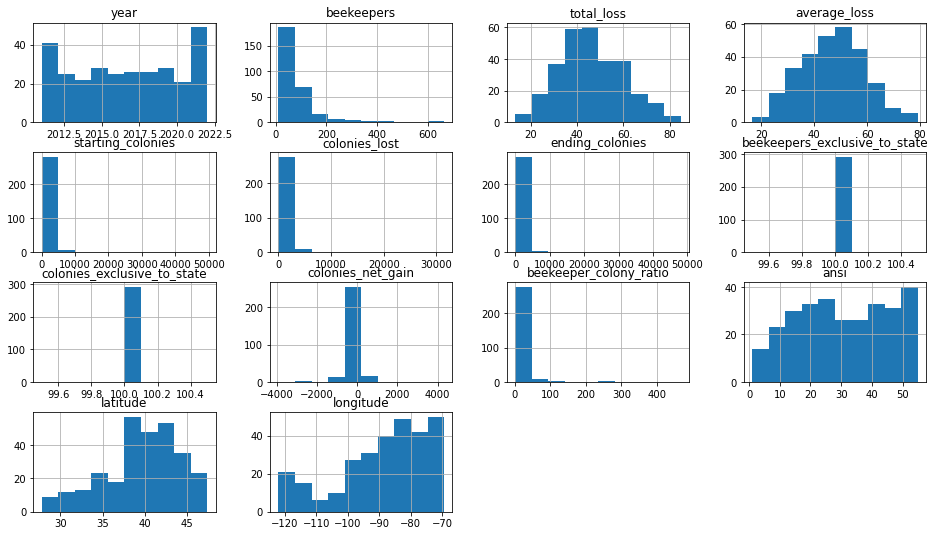

In [8]:
# preliminary univariate exploration histograms
train.hist(figsize=[16,9])
plt.show()

- Total loss and average loss have a normal distribution. The other columns may also have normal distributions if outliers are removed.

## Does the beekeeper to hive ratio have an effect on colony loss? If so, does a higher beekeeper to hive ratio have less or more loss?

<Figure size 1152x648 with 0 Axes>

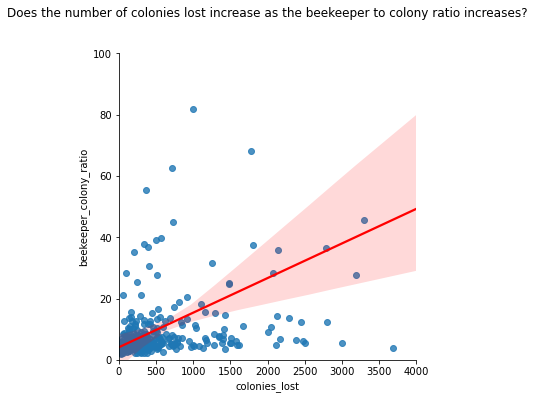

In [9]:
# relationship between total_loss and beekeepers with regression line
plt.figure(figsize=[16,9])
# plot data and regression line for colonies_lost and beekeeper_colony_ratio
sns.lmplot(x='colonies_lost', y='beekeeper_colony_ratio', data=train, line_kws={'color': 'red'})
plt.xlim([0,4000])
plt.ylim([0,100])
plt.title('Does the number of colonies lost increase as the beekeeper to colony ratio increases?', y=1.1)
plt.show()

## Statistical test for correlation between colonies_lost and beekeeper_colony_ratio

- H0: There is no relationship between the number of colonies lost annually and the beekeeper to colony ratio.

- Ha: There is a relationship between the number of colonies lost annually and the beekeeper to colony ratio.

- Stats test: correlation (continuous & continuous)

In [10]:
corr, p = stats.pearsonr(train.beekeeper_colony_ratio, train.colonies_lost)
corr, p

(0.7650637965806383, 3.5116632381447964e-57)

In [11]:
alpha = .05
if p < alpha:
    print('We reject the null hypothesis.')
else:
    print('We fail to reject the null hypothesis.')

We reject the null hypothesis.


### We can reject the null hypothesis that there is no relationship between the number of colonies lost annually and the beekeeper to colony ratio.

## How many colonies diminished over time? (State/Overall)

<AxesSubplot:title={'center':'Net colony loss / gain over time for all states'}, xlabel='year', ylabel='Colony change per year'>

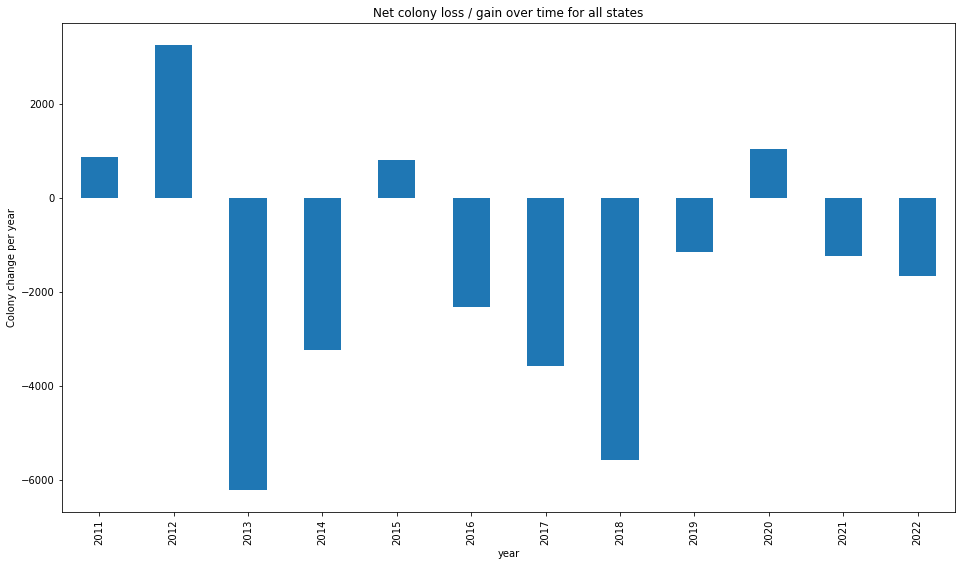

In [12]:
train.groupby('year').colonies_net_gain.sum().plot.bar(figsize=[16,9], title='Net colony loss / gain over time for all states',
                                                      ylabel='Colony change per year')

- Most years have a net loss in the overall number of colonies in the US.
- 2011, 2012, 2015, and 2020 showed net gains. What was happening during those years that affected colony loss?
- 2013 and 2018 saw a significant loss overall. What happened during those years?

## Which state suffered the heaviest loss? Which state has the least loss / highest gain?

<AxesSubplot:title={'center':'Cumulative colony loss / gain from 2011-2022 per states'}, ylabel='state'>

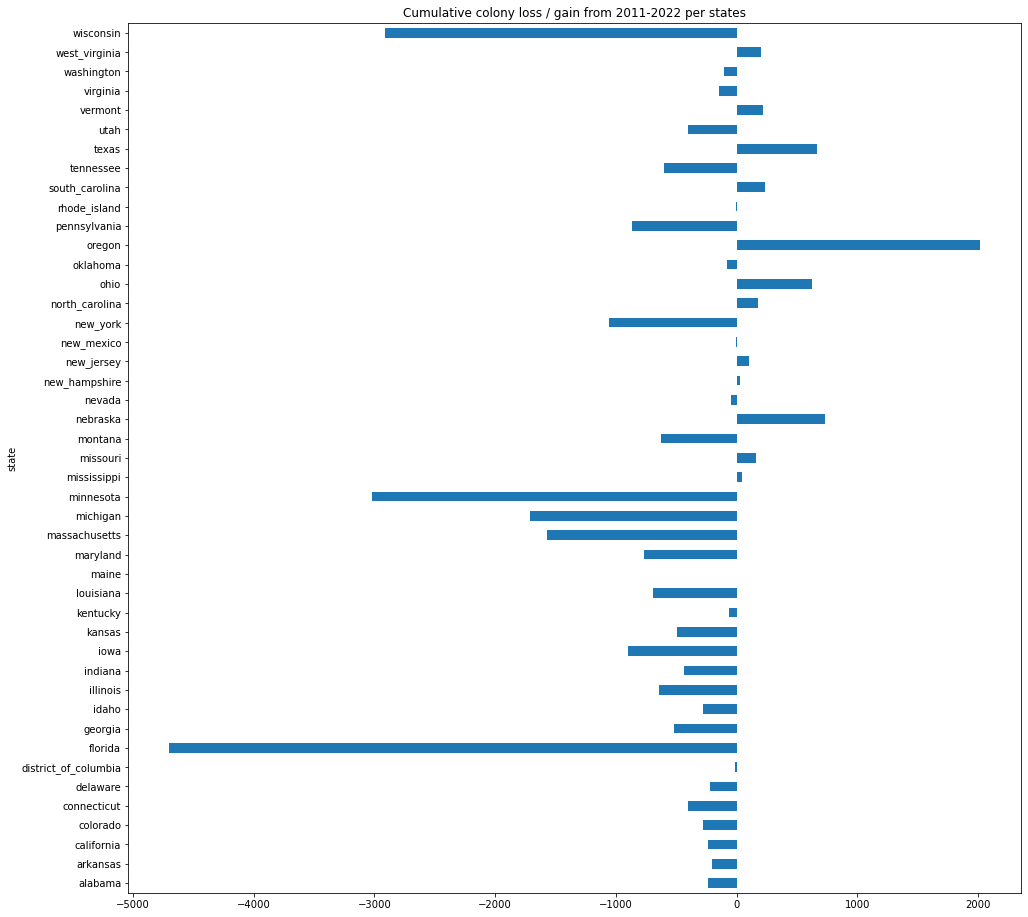

In [13]:
train.groupby(['state']).colonies_net_gain.sum().plot.barh(figsize=[16,16], title='Cumulative colony loss / gain from 2011-2022 per states',
                                                      ylabel='Net colony gain/loss')

In [14]:
train.groupby(['state']).colonies_net_gain.sum()

state
alabama                 -237
arkansas                -204
california              -236
colorado                -278
connecticut             -407
delaware                -221
district_of_columbia     -11
florida                -4703
georgia                 -520
idaho                   -276
illinois                -640
indiana                 -436
iowa                    -897
kansas                  -494
kentucky                 -62
louisiana               -696
maine                      1
maryland                -767
massachusetts          -1570
michigan               -1713
minnesota              -3021
mississippi               44
missouri                 156
montana                 -629
nebraska                 728
nevada                   -51
new_hampshire             28
new_jersey               101
new_mexico               -10
new_york               -1061
north_carolina           174
ohio                     626
oklahoma                 -84
oregon                  2018
pennsylv

- Florida has the highest net loss over time, followed by Minnesota. This may indicate that northern vs. southern locations may not play as much of a role as we initially thought.
- Pennsylvania has the highest net gain from 2011-2022. What are they doing right to keep increasing their colonies?

<Figure size 1152x648 with 0 Axes>

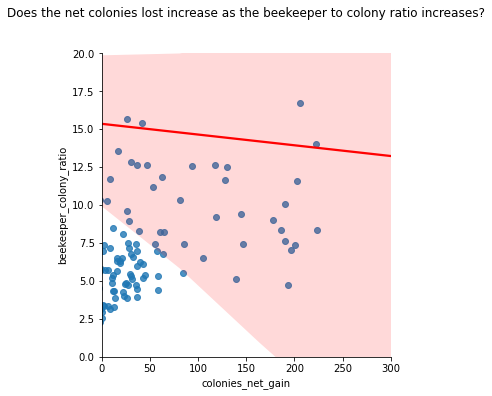

In [15]:
# relationship between total_loss and beekeepers with regression line
plt.figure(figsize=[16,9])
sns.lmplot(x='colonies_net_gain', y='beekeeper_colony_ratio', data=train, line_kws={'color': 'red'})
plt.xlim([0,300])
plt.ylim([0,20])
plt.title('Does the net colonies lost increase as the beekeeper to colony ratio increases?', y=1.1)
plt.show()

Outliers seem to significantly change the regression line, but when we zoom in to where the majority of the data is, perhaps there is a different correlation (or none at all).

In [16]:
from datetime import timedelta, datetime

In [17]:
bee_time = pd.read_csv('bee_colony_loss.csv')

In [18]:
bee_time = bee_time.drop(columns='Unnamed: 0')

In [19]:
bee_time = bee_time.dropna()

In [20]:
bee_time = bee_time.drop_duplicates()

In [21]:
bee_time = bee_time[bee_time.beekeepers > 10]

In [22]:
bee_time.state = bee_time.state.str.lower().str.replace(' ','')

In [23]:
bee_time.season = bee_time.season.str.lower()

In [24]:
bee_time

,state,year,season,beekeepers,total_loss,average_loss,starting_colonies,colonies_lost,ending_colonies,beekeepers_exclusive_to_state,colonies_exclusive_to_state
104,alabama,2008,winter,16,41.91616766,29.61021611,4848,2240,3104,100.000000,100.000000
107,arkansas,2008,winter,20,17.44958753,12.78683599,16955,3046,14410,100.000000,100.000000
108,california,2008,winter,36,29.25302934,29.34580306,184085,58712,141992,13.888889,9.161529
113,florida,2008,winter,23,40.02948325,30.02804428,50897,30141,45156,65.217391,33.581547
114,georgia,2008,winter,15,34.48179999,29.08668859,42876,18605,35351,100.000000,100.000000
...,...,...,...,...,...,...,...,...,...,...,...
7012,vermont,2022,winter,25,50.8260447,43.50472975,1019,523,506,100.000000,100.000000
7013,virginia,2022,winter,284,31.76043557,37.62563342,2463,875,1880,100.000000,100.000000
7014,washington,2022,winter,80,36.25377644,51.57911561,625,240,422,100.000000,100.000000
7015,westvirginia,2022,winter,27,54.26195426,53.15801429,427,261,220,100.000000,100.000000


In [25]:
bee_time.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3459 entries, 104 to 7016
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          3459 non-null   object 
 1   year                           3459 non-null   int64  
 2   season                         3459 non-null   object 
 3   beekeepers                     3459 non-null   int64  
 4   total_loss                     3459 non-null   object 
 5   average_loss                   3459 non-null   object 
 6   starting_colonies              3459 non-null   int64  
 7   colonies_lost                  3459 non-null   object 
 8   ending_colonies                3459 non-null   object 
 9   beekeepers_exclusive_to_state  3459 non-null   float64
 10  colonies_exclusive_to_state    3459 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 324.3+ KB


In [26]:
bee_time.total_loss = bee_time.total_loss.astype(float)

In [27]:
bee_time.average_loss = bee_time.average_loss.astype(float)

In [28]:
bee_time.colonies_lost = bee_time.colonies_lost.astype(int)

In [29]:
bee_time.ending_colonies = bee_time.ending_colonies.astype(int)

In [30]:
bee_time = bee_time[bee_time.beekeepers_exclusive_to_state == 100]

In [31]:
bee_time['colonies_net_gain'] = bee_time.ending_colonies - bee_time.starting_colonies

/var/folders/5g/xrhpsnj56_v3scw9s4trbgxc0000gn/T/ipykernel_19367/2949606796.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bee_time['colonies_net_gain'] = bee_time.ending_colonies - bee_time.starting_colonies


In [32]:
bee_time['beekeeper_colony_ratio'] = bee_time.ending_colonies / bee_time.beekeepers

/var/folders/5g/xrhpsnj56_v3scw9s4trbgxc0000gn/T/ipykernel_19367/2665520337.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bee_time['beekeeper_colony_ratio'] = bee_time.ending_colonies / bee_time.beekeepers


In [33]:
bee_time.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1580 entries, 104 to 7016
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          1580 non-null   object 
 1   year                           1580 non-null   int64  
 2   season                         1580 non-null   object 
 3   beekeepers                     1580 non-null   int64  
 4   total_loss                     1580 non-null   float64
 5   average_loss                   1580 non-null   float64
 6   starting_colonies              1580 non-null   int64  
 7   colonies_lost                  1580 non-null   int64  
 8   ending_colonies                1580 non-null   int64  
 9   beekeepers_exclusive_to_state  1580 non-null   float64
 10  colonies_exclusive_to_state    1580 non-null   float64
 11  colonies_net_gain              1580 non-null   int64  
 12  beekeeper_colony_ratio         1580 non-null  

In [34]:
bee_time.year = pd.to_datetime(bee_time.year, format='%Y')

/var/folders/5g/xrhpsnj56_v3scw9s4trbgxc0000gn/T/ipykernel_19367/3852519015.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bee_time.year = pd.to_datetime(bee_time.year, format='%Y')


In [35]:
bee_time = bee_time.set_index('year').sort_index()

In [36]:
# train_size = .70
# n = bee_time.shape[0]
# est_start_index = round(train_size * n)

# train = bee_time[:test_start_index] # everything up (not including) to the test_start_index
# test = bee_time[test_start_index:] # everything from the test_start_index to the end

# plt.plot(train.index, train.colonies_lost)
# plt.plot(test.index, test.colonies_lost)

NameError: name 'test_start_index' is not defined

In [37]:
train.shape, test.shape

((291, 16), (98, 16))

In [38]:
train.index

Int64Index([264, 160,  72, 410, 277,  74, 461, 384, 398, 244,
            ...
            469,  60,  27, 444, 354, 292,  65,  61, 223, 434],
           dtype='int64', length=291)

In [39]:
test.index

Int64Index([262, 391,  50, 202, 215, 151,  42, 291, 387, 182,  44, 231,  73,
            245, 128, 210,  34, 131,   1,  20, 145, 468, 159,  59, 326, 380,
            106,  31, 284, 180, 451, 149, 233, 370, 324, 336, 105, 367, 471,
            276, 371, 226, 382, 298, 411, 195, 125,  78, 478, 397, 236, 348,
             29, 375, 356, 197, 484, 161,  26, 271, 283, 432,  79,  54,   2,
            190, 420, 430, 417, 249, 132, 352, 438,  48,  99, 200, 379, 359,
            378, 304, 112, 184, 393, 109, 120, 441, 253, 303, 191, 350, 225,
             62, 310, 285, 248, 341, 328,  87],
           dtype='int64')

In [40]:
train.resample('Y').mean()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Int64Index'

In [ ]:
train.resample('Y').colonies_lost.sum().plot(xlim=[40,48])

In [41]:
train.resample('Y').beekeeper_colony_ratio.sum(
).plot(figsize=[12,6],xlim=[40,48], 
       title='How has the beekeeper-to-colony ratio changed over time?', ylabel='Bee colonies per beekeeper')
plt.show()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Int64Index'

In [42]:
train.resample('Y').average_loss.sum().plot(figsize=[12,6], xlim=[40,48])

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Int64Index'

In [43]:
plt.figure(figsize=(16, 10))
train.colonies_lost.groupby([train.index.year]).sum().plot(figsize = (12,6), xlim=[2010,2018])
plt.title('Colonies Lost Per Year', fontsize = 16)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

AttributeError: 'Int64Index' object has no attribute 'year'

<Figure size 1152x720 with 0 Axes>

In [44]:
df2 = pd.read_csv('bee_colony_loss.csv')

In [45]:
df2 = df2.drop(columns='Unnamed: 0')

In [46]:
df2.season = df2.season.str.lower()

In [47]:
df2.state = df2.state.str.lower().str.replace(' ','_')

In [48]:
df2 = df2[df2.beekeepers > 10]

In [49]:
df2

,state,year,season,beekeepers,total_loss,average_loss,starting_colonies,colonies_lost,ending_colonies,beekeepers_exclusive_to_state,colonies_exclusive_to_state
104,alabama,2008,winter,16,41.91616766,29.61021611,4848,2240,3104,100.000000,100.000000
107,arkansas,2008,winter,20,17.44958753,12.78683599,16955,3046,14410,100.000000,100.000000
108,california,2008,winter,36,29.25302934,29.34580306,184085,58712,141992,13.888889,9.161529
113,florida,2008,winter,23,40.02948325,30.02804428,50897,30141,45156,65.217391,33.581547
114,georgia,2008,winter,15,34.48179999,29.08668859,42876,18605,35351,100.000000,100.000000
...,...,...,...,...,...,...,...,...,...,...,...
7013,virginia,2022,winter,284,31.76043557,37.62563342,2463,875,1880,100.000000,100.000000
7014,washington,2022,winter,80,36.25377644,51.57911561,625,240,422,100.000000,100.000000
7015,west_virginia,2022,winter,27,54.26195426,53.15801429,427,261,220,100.000000,100.000000
7016,wisconsin,2022,winter,99,51.82101977,60.78178057,917,498,463,100.000000,100.000000


In [50]:
dummy_df = pd.get_dummies(df2.season)
dummy_df

,annual,summer,winter
104,0,0,1
107,0,0,1
108,0,0,1
113,0,0,1
114,0,0,1
...,...,...,...
7013,0,0,1
7014,0,0,1
7015,0,0,1
7016,0,0,1


In [51]:
df2 = pd.concat([df2, dummy_df], axis=1)

In [52]:
df2

,state,year,season,beekeepers,total_loss,average_loss,starting_colonies,colonies_lost,ending_colonies,beekeepers_exclusive_to_state,colonies_exclusive_to_state,annual,summer,winter
104,alabama,2008,winter,16,41.91616766,29.61021611,4848,2240,3104,100.000000,100.000000,0,0,1
107,arkansas,2008,winter,20,17.44958753,12.78683599,16955,3046,14410,100.000000,100.000000,0,0,1
108,california,2008,winter,36,29.25302934,29.34580306,184085,58712,141992,13.888889,9.161529,0,0,1
113,florida,2008,winter,23,40.02948325,30.02804428,50897,30141,45156,65.217391,33.581547,0,0,1
114,georgia,2008,winter,15,34.48179999,29.08668859,42876,18605,35351,100.000000,100.000000,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7013,virginia,2022,winter,284,31.76043557,37.62563342,2463,875,1880,100.000000,100.000000,0,0,1
7014,washington,2022,winter,80,36.25377644,51.57911561,625,240,422,100.000000,100.000000,0,0,1
7015,west_virginia,2022,winter,27,54.26195426,53.15801429,427,261,220,100.000000,100.000000,0,0,1
7016,wisconsin,2022,winter,99,51.82101977,60.78178057,917,498,463,100.000000,100.000000,0,0,1


In [53]:
df2 = df2[df2.beekeepers_exclusive_to_state == 100]

In [54]:
df2.average_loss = df2.average_loss.astype(float)

/var/folders/5g/xrhpsnj56_v3scw9s4trbgxc0000gn/T/ipykernel_19367/203527564.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.average_loss = df2.average_loss.astype(float)


In [55]:
df2.total_loss = df2.total_loss.astype(float)

/var/folders/5g/xrhpsnj56_v3scw9s4trbgxc0000gn/T/ipykernel_19367/2128976123.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.total_loss = df2.total_loss.astype(float)


In [56]:
df2.colonies_lost = df2.colonies_lost.astype(int)

/var/folders/5g/xrhpsnj56_v3scw9s4trbgxc0000gn/T/ipykernel_19367/167427573.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.colonies_lost = df2.colonies_lost.astype(int)


In [57]:
df2.ending_colonies = df2.ending_colonies.astype(int)

/var/folders/5g/xrhpsnj56_v3scw9s4trbgxc0000gn/T/ipykernel_19367/1123549767.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.ending_colonies = df2.ending_colonies.astype(int)


In [58]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1703 entries, 104 to 7016
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          1703 non-null   object 
 1   year                           1703 non-null   int64  
 2   season                         1703 non-null   object 
 3   beekeepers                     1703 non-null   int64  
 4   total_loss                     1703 non-null   float64
 5   average_loss                   1703 non-null   float64
 6   starting_colonies              1703 non-null   int64  
 7   colonies_lost                  1703 non-null   int64  
 8   ending_colonies                1703 non-null   int64  
 9   beekeepers_exclusive_to_state  1703 non-null   float64
 10  colonies_exclusive_to_state    1703 non-null   float64
 11  annual                         1703 non-null   uint8  
 12  summer                         1703 non-null  

In [59]:
df2.year[df2.season=='winter'] = df2.year.astype(str) + '-10-01'

/var/folders/5g/xrhpsnj56_v3scw9s4trbgxc0000gn/T/ipykernel_19367/3157413368.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.year[df2.season=='winter'] = df2.year.astype(str) + '-10-01'
/var/folders/5g/xrhpsnj56_v3scw9s4trbgxc0000gn/T/ipykernel_19367/3157413368.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.year[df2.season=='winter'] = df2.year.astype(str) + '-10-01'


In [60]:
df2.year[df2.season=='summer'] = df2.year.astype(str) + '-04-01'

/var/folders/5g/xrhpsnj56_v3scw9s4trbgxc0000gn/T/ipykernel_19367/1197244600.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.year[df2.season=='summer'] = df2.year.astype(str) + '-04-01'
/var/folders/5g/xrhpsnj56_v3scw9s4trbgxc0000gn/T/ipykernel_19367/1197244600.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.year[df2.season=='summer'] = df2.year.astype(str) + '-04-01'


In [61]:
df2.year[df2.season=='annual'] = df2.year.astype(str) + '-01-01'

/var/folders/5g/xrhpsnj56_v3scw9s4trbgxc0000gn/T/ipykernel_19367/460969660.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.year[df2.season=='annual'] = df2.year.astype(str) + '-01-01'
/var/folders/5g/xrhpsnj56_v3scw9s4trbgxc0000gn/T/ipykernel_19367/460969660.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.year[df2.season=='annual'] = df2.year.astype(str) + '-01-01'


In [62]:
df2.year = pd.to_datetime(df2.year)

/var/folders/5g/xrhpsnj56_v3scw9s4trbgxc0000gn/T/ipykernel_19367/2291992319.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.year = pd.to_datetime(df2.year)


In [63]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1703 entries, 104 to 7016
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   state                          1703 non-null   object        
 1   year                           1703 non-null   datetime64[ns]
 2   season                         1703 non-null   object        
 3   beekeepers                     1703 non-null   int64         
 4   total_loss                     1703 non-null   float64       
 5   average_loss                   1703 non-null   float64       
 6   starting_colonies              1703 non-null   int64         
 7   colonies_lost                  1703 non-null   int64         
 8   ending_colonies                1703 non-null   int64         
 9   beekeepers_exclusive_to_state  1703 non-null   float64       
 10  colonies_exclusive_to_state    1703 non-null   float64       
 11  annual         

In [64]:
train = df2[df2['year'].dt.year <= 2017]
val = df2[df2['year'].dt.year > 2017]

In [65]:
validate = val[val['year'].dt.year <= 2020]
test = val[val['year'].dt.year > 2020]

In [66]:
train.shape, validate.shape, test.shape

((1026, 14), (409, 14), (268, 14))

In [67]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1026 entries, 104 to 6238
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   state                          1026 non-null   object        
 1   year                           1026 non-null   datetime64[ns]
 2   season                         1026 non-null   object        
 3   beekeepers                     1026 non-null   int64         
 4   total_loss                     1026 non-null   float64       
 5   average_loss                   1026 non-null   float64       
 6   starting_colonies              1026 non-null   int64         
 7   colonies_lost                  1026 non-null   int64         
 8   ending_colonies                1026 non-null   int64         
 9   beekeepers_exclusive_to_state  1026 non-null   float64       
 10  colonies_exclusive_to_state    1026 non-null   float64       
 11  annual         

In [68]:
train = train.set_index('year').sort_index()
train

,state,season,beekeepers,total_loss,average_loss,starting_colonies,colonies_lost,ending_colonies,beekeepers_exclusive_to_state,colonies_exclusive_to_state,annual,summer,winter
year,,,,,,,,,,,,,
2008-10-01,alabama,winter,16,41.916168,29.610216,4848,2240,3104,100.0,100.0,0,0,1
2008-10-01,alabama,winter,16,41.916168,29.610216,4848,2240,3104,100.0,100.0,0,0,1
2008-10-01,arkansas,winter,20,17.449588,12.786836,16955,3046,14410,100.0,100.0,0,0,1
2008-10-01,florida,winter,15,29.323873,27.456471,17092,7811,18826,100.0,100.0,0,0,1
2008-10-01,georgia,winter,15,34.481800,29.086689,42876,18605,35351,100.0,100.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-10-01,maine,winter,80,45.498392,54.645797,613,283,339,100.0,100.0,0,0,1
2017-10-01,maryland,winter,149,43.715847,42.035286,1533,720,927,100.0,100.0,0,0,1
2017-10-01,massachusetts,winter,108,41.505792,50.766872,504,215,303,100.0,100.0,0,0,1


In [69]:
train.season.value_counts()

winter    409
summer    309
annual    308
Name: season, dtype: int64

In [70]:
def ts_bee_prep():
    df2 = pd.read_csv('bee_colony_loss.csv')
    df2 = df2.drop(columns='Unnamed: 0')
    df2.season = df2.season.str.lower()
    df2.state = df2.state.str.lower().str.replace(' ','_')
    df2 = df2[df2.beekeepers > 10]
    dummy_df = pd.get_dummies(df2.season)
    df2 = pd.concat([df2, dummy_df], axis=1)
    df2 = df2[df2.beekeepers_exclusive_to_state == 100]
    df2.average_loss = df2.average_loss.astype(float)
    df2.total_loss = df2.total_loss.astype(float)
    df2.colonies_lost = df2.colonies_lost.astype(int)
    df2.ending_colonies = df2.ending_colonies.astype(int)
    df2.year[df2.season=='winter'] = df2.year.astype(str) + '-10-01'
    df2.year[df2.season=='summer'] = df2.year.astype(str) + '-04-01'
    df2.year[df2.season=='annual'] = df2.year.astype(str) + '-01-01'
    df2.year = pd.to_datetime(df2.year)
    return df2

In [71]:
def ts_split(df2):
    train = df2[df2['year'].dt.year <= 2017]
    val = df2[df2['year'].dt.year > 2017]
    validate = val[val['year'].dt.year <= 2020]
    test = val[val['year'].dt.year > 2020]
    return train, validate, test

## Does Summer or Winter have the largest loss?

<Figure size 1152x720 with 0 Axes>

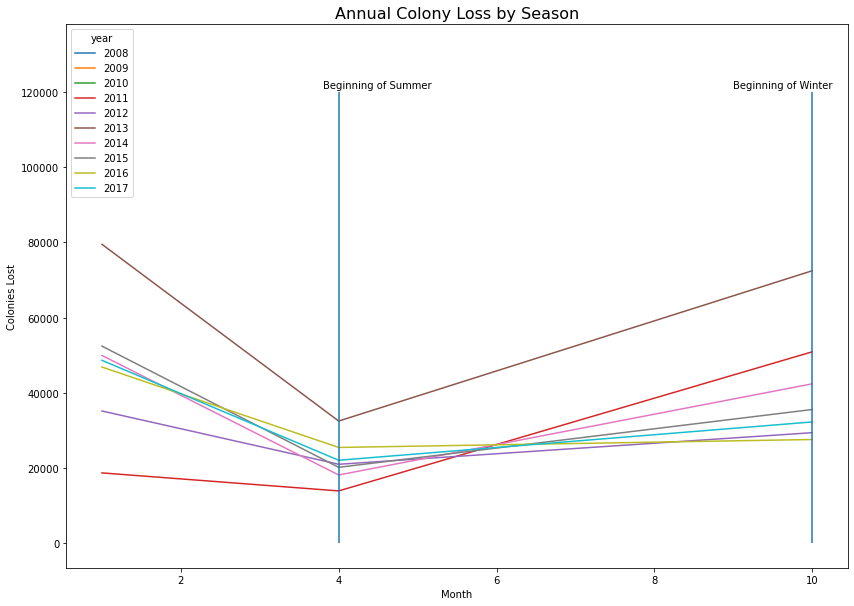

In [72]:
plt.figure(figsize=(16, 10))
train.colonies_lost.groupby([train.index.year, train.index.month]).sum().unstack(0).plot(figsize = (14,10))
plt.title('Annual Colony Loss by Season', fontsize = 16)
plt.ticklabel_format(style='plain', axis='y')
plt.vlines(x=4, ymin=0, ymax=120000)
plt.vlines(x=10, ymin=0, ymax=120000)
plt.annotate('Beginning of Summer', [3.8,121000], xycoords='data')
plt.annotate('Beginning of Winter', [9.0,121000], xycoords='data')
plt.xlabel('Month')
plt.ylabel('Colonies Lost')
plt.show()

In [73]:
season_df = train[train.season!='annual']
season_df

,state,season,beekeepers,total_loss,average_loss,starting_colonies,colonies_lost,ending_colonies,beekeepers_exclusive_to_state,colonies_exclusive_to_state,annual,summer,winter
year,,,,,,,,,,,,,
2008-10-01,alabama,winter,16,41.916168,29.610216,4848,2240,3104,100.0,100.0,0,0,1
2008-10-01,alabama,winter,16,41.916168,29.610216,4848,2240,3104,100.0,100.0,0,0,1
2008-10-01,arkansas,winter,20,17.449588,12.786836,16955,3046,14410,100.0,100.0,0,0,1
2008-10-01,florida,winter,15,29.323873,27.456471,17092,7811,18826,100.0,100.0,0,0,1
2008-10-01,georgia,winter,15,34.481800,29.086689,42876,18605,35351,100.0,100.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-10-01,maine,winter,80,45.498392,54.645797,613,283,339,100.0,100.0,0,0,1
2017-10-01,maryland,winter,149,43.715847,42.035286,1533,720,927,100.0,100.0,0,0,1
2017-10-01,massachusetts,winter,108,41.505792,50.766872,504,215,303,100.0,100.0,0,0,1


## Statistical test for significant difference between colonies lost in winter and colonies lost in summer

- H0: There is no difference between the number of colonies lost in the summer and the number of colonies lost in the winter.

- Ha: There is a difference between the number of colonies lost in the summer and the number of colonies lost in the winter.

- Stats test: T-test (categorical & continuous)

In [74]:
alpha = .05
stat, pval = stats.levene(season_df.colonies_lost[season_df.season=='summer'], season_df.colonies_lost[season_df.season=='winter'])

In [75]:
if pval < alpha:
    print('We can reject the null hypothesis of equal variances.')
else:
    print('We fail to reject the null hypothesis that variance is equal.')

We can reject the null hypothesis of equal variances.


In [76]:
winter_loss = season_df.colonies_lost[season_df.season=='winter']

In [77]:
summer_loss = season_df.colonies_lost[season_df.season=='summer']

In [78]:
t, p = stats.ttest_ind(winter_loss, summer_loss, equal_var=False)

In [79]:
t, p

(4.321910117958223, 1.8395795654605954e-05)

In [80]:
if (t > 0) and ((p/2) < alpha):
    print('We reject our null hypothesis that there is no difference in colony loss in summer and winter.')
else:
    print('we fail to reject our null hypothesis that there is no difference in colony loss in summer and winter.')

We reject our null hypothesis that there is no difference in colony loss in summer and winter.


### We can reject the null hypothesis that there is no difference in colony loss between summer and winter.

In [81]:
# this is the csv from the BeeInformed Project website. It contains all the data from the USDA as well as statistical
# test data. The dataset we are already using contains the useful data in this csv.
bip = pd.read_csv('bee_loss_bip.csv')

In [82]:
bip

,Column name as written in R Script,Full State name,State abbreviation,Survey Year,Season,"Method of tallying multi-states operations (included in all states, excluded from all states, exlusively multi-states)",Number of valid respondents,Bootstrap replication,Bootstrap method,Bootstrap estimate of the Total Loss (weigthed average),...,standard deviation of operational losses,standard error of the unweithed average estimate,glm-based 95% confidence interval(low) of the unweighted average loss,glm-based 95% confidence interval(high) of the unweighted average loss,Total number of colonies at the start of the season,"Total number of colonies ""at risk"" (colonies at the start, new colonies added, without colonies sold or given away)",Total number of colonies lost during the season,Total number of colonies alive at the end of the season,Percentage of beekeepers exlusive to the state,Percentage of colonies exclusive to the state
0,State,state,initials,SurveyYear,Season,Method,N,b.rep,b.method,TL.b.mean,...,AvL.sd,AvL.se,AvL.CI2.5,AvL.CI97.5,TotalColStart,TotalColAtRisk,TotalColLost,TotalColAlive,PtBkExclusiveToState,PColExclusiveToState
1,TF_States_AL,Alabama,AL,2008,Annual,MSO in,0,1000,n-out-of-n,NaN,...,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN
2,TF_States_AK,Alaska,AK,2008,Annual,MSO in,0,1000,n-out-of-n,NaN,...,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN
3,TF_States_AZ,Arizona,AZ,2008,Annual,MSO in,0,1000,n-out-of-n,NaN,...,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN
4,TF_States_AR,Arkansas,AR,2008,Annual,MSO in,0,1000,n-out-of-n,NaN,...,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7016,TF_States_WV,West Virginia,WV,2022,Winter,MSO out,27,1000,n-out-of-n,53.2453375,...,30.13213004,5.79893113,41.79210927,64.52391931,427,481,261,220,100,100
7017,TF_States_WI,Wisconsin,WI,2022,Winter,MSO out,99,1000,n-out-of-n,52.52256523,...,37.80029595,3.799072686,53.3355981,68.22796303,917,961,498,463,100,100
7018,TF_States_WY,Wyoming,WY,2022,Winter,MSO out,8,1000,n-out-of-n,NaN,...,[R],[R],[R],[R],35,36,[R],[R],100,100
7019,TF_States_NCUSA,Non Continental USA,NCUSA,2022,Winter,MSO out,7,1000,n-out-of-n,NaN,...,[R],[R],[R],[R],577,577,[R],[R],100,100


In [85]:
aphis = pd.read_csv('aphis_data.csv')

In [86]:
aphis

,sample_year,sample_month_number,sample_month,state_code,sampling_county,varroa_per_100_bees,million_spores_per_bee,abpv,abpv_percentile,cbpv,...,iapv_percentile,kbv,kbv_percentile,lsv2,lsv2_percentile,sbpv,sbpv_percentile,mkv,mkv_percentile,pesticides
0,2009,7,July,HI,NaN,0.00,0.02,NaN,NaN,-,...,NaN,-,NaN,NaN,NaN,-,NaN,NaN,NaN,NaN
1,2009,7,July,HI,NaN,3.46,0.03,NaN,NaN,-,...,NaN,-,NaN,NaN,NaN,-,NaN,NaN,NaN,NaN
2,2009,7,July,HI,NaN,11.48,0.03,NaN,NaN,-,...,NaN,-,NaN,NaN,NaN,-,NaN,NaN,NaN,NaN
3,2009,7,July,HI,NaN,14.00,0.08,NaN,NaN,-,...,NaN,+,NaN,NaN,NaN,-,NaN,NaN,NaN,NaN
4,2009,7,July,HI,NaN,1.15,0.03,NaN,NaN,-,...,NaN,-,NaN,NaN,NaN,-,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8293,2020,12,December,FL,Pasco,0.38,0.30,-,NaN,+,...,<30,-,NaN,-,NaN,-,NaN,-,NaN,NaN
8294,2020,12,December,FL,Pinellas,9.74,0.35,-,NaN,-,...,NaN,-,NaN,-,NaN,-,NaN,-,NaN,"Bee Bread, DEET (30.0), Fenazaquin (5.0)"
8295,2020,12,December,FL,Polk,0.00,0.60,-,NaN,-,...,NaN,-,NaN,+,<30,-,NaN,-,NaN,NaN
8296,2020,12,December,FL,Polk,0.14,0.30,+,<30,-,...,NaN,-,NaN,+,40,-,NaN,-,NaN,NaN


In [87]:
aphis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8298 entries, 0 to 8297
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   sample_year             8298 non-null   int64  
 1   sample_month_number     8298 non-null   int64  
 2   sample_month            8298 non-null   object 
 3   state_code              8298 non-null   object 
 4   sampling_county         5118 non-null   object 
 5   varroa_per_100_bees     8227 non-null   float64
 6   million_spores_per_bee  8231 non-null   float64
 7   abpv                    7802 non-null   object 
 8   abpv_percentile         1132 non-null   object 
 9   cbpv                    7593 non-null   object 
 10  cbpv_percentile         679 non-null    object 
 11  dwv                     7951 non-null   object 
 12  dwv_percentile          4808 non-null   object 
 13  dwv-b                   4041 non-null   object 
 14  dwv-b_percentile        3315 non-null   

In [88]:
aphis = aphis.drop(columns=['sampling_county','abpv_percentile','cbpv_percentile','dwv_percentile','dwv-b_percentile',
                   'iapv_percentile','kbv_percentile','lsv2_percentile','sbpv_percentile','mkv_percentile'])

In [89]:
aphis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8298 entries, 0 to 8297
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   sample_year             8298 non-null   int64  
 1   sample_month_number     8298 non-null   int64  
 2   sample_month            8298 non-null   object 
 3   state_code              8298 non-null   object 
 4   varroa_per_100_bees     8227 non-null   float64
 5   million_spores_per_bee  8231 non-null   float64
 6   abpv                    7802 non-null   object 
 7   cbpv                    7593 non-null   object 
 8   dwv                     7951 non-null   object 
 9   dwv-b                   4041 non-null   object 
 10  iapv                    7884 non-null   object 
 11  kbv                     7157 non-null   object 
 12  lsv2                    6053 non-null   object 
 13  sbpv                    5335 non-null   object 
 14  mkv                     2209 non-null   

In [90]:
aphis.sample_year.value_counts()

2018    1061
2017     951
2016     935
2019     798
2013     786
2015     732
2020     728
2012     710
2011     685
2014     599
2010     294
2009      19
Name: sample_year, dtype: int64

In [91]:
aphis

,sample_year,sample_month_number,sample_month,state_code,varroa_per_100_bees,million_spores_per_bee,abpv,cbpv,dwv,dwv-b,iapv,kbv,lsv2,sbpv,mkv,pesticides
0,2009,7,July,HI,0.00,0.02,NaN,-,+,NaN,-,-,NaN,-,NaN,NaN
1,2009,7,July,HI,3.46,0.03,NaN,-,+,NaN,-,-,NaN,-,NaN,NaN
2,2009,7,July,HI,11.48,0.03,NaN,-,-,NaN,-,-,NaN,-,NaN,NaN
3,2009,7,July,HI,14.00,0.08,NaN,-,+,NaN,-,+,NaN,-,NaN,NaN
4,2009,7,July,HI,1.15,0.03,NaN,-,+,NaN,-,-,NaN,-,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8293,2020,12,December,FL,0.38,0.30,-,+,+,+,+,-,-,-,-,NaN
8294,2020,12,December,FL,9.74,0.35,-,-,+,+,-,-,-,-,-,"Bee Bread, DEET (30.0), Fenazaquin (5.0)"
8295,2020,12,December,FL,0.00,0.60,-,-,+,+,-,-,+,-,-,NaN
8296,2020,12,December,FL,0.14,0.30,+,-,+,+,-,-,+,-,-,NaN


In [92]:
aphis.describe()

,sample_year,sample_month_number,varroa_per_100_bees,million_spores_per_bee
count,8298.000000,8298.000000,8227.000000,8231.000000
mean,2015.509400,7.344541,3.604195,0.290112
std,2.950513,2.355066,4.918379,0.794789
min,2009.000000,1.000000,0.000000,0.000000
25%,2013.000000,6.000000,0.440000,0.000000
50%,2016.000000,8.000000,1.850000,0.000000
75%,2018.000000,9.000000,4.830000,0.250000
max,2020.000000,12.000000,63.900000,13.950000


In [93]:
bip

,Column name as written in R Script,Full State name,State abbreviation,Survey Year,Season,"Method of tallying multi-states operations (included in all states, excluded from all states, exlusively multi-states)",Number of valid respondents,Bootstrap replication,Bootstrap method,Bootstrap estimate of the Total Loss (weigthed average),...,standard deviation of operational losses,standard error of the unweithed average estimate,glm-based 95% confidence interval(low) of the unweighted average loss,glm-based 95% confidence interval(high) of the unweighted average loss,Total number of colonies at the start of the season,"Total number of colonies ""at risk"" (colonies at the start, new colonies added, without colonies sold or given away)",Total number of colonies lost during the season,Total number of colonies alive at the end of the season,Percentage of beekeepers exlusive to the state,Percentage of colonies exclusive to the state
0,State,state,initials,SurveyYear,Season,Method,N,b.rep,b.method,TL.b.mean,...,AvL.sd,AvL.se,AvL.CI2.5,AvL.CI97.5,TotalColStart,TotalColAtRisk,TotalColLost,TotalColAlive,PtBkExclusiveToState,PColExclusiveToState
1,TF_States_AL,Alabama,AL,2008,Annual,MSO in,0,1000,n-out-of-n,NaN,...,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN
2,TF_States_AK,Alaska,AK,2008,Annual,MSO in,0,1000,n-out-of-n,NaN,...,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN
3,TF_States_AZ,Arizona,AZ,2008,Annual,MSO in,0,1000,n-out-of-n,NaN,...,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN
4,TF_States_AR,Arkansas,AR,2008,Annual,MSO in,0,1000,n-out-of-n,NaN,...,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7016,TF_States_WV,West Virginia,WV,2022,Winter,MSO out,27,1000,n-out-of-n,53.2453375,...,30.13213004,5.79893113,41.79210927,64.52391931,427,481,261,220,100,100
7017,TF_States_WI,Wisconsin,WI,2022,Winter,MSO out,99,1000,n-out-of-n,52.52256523,...,37.80029595,3.799072686,53.3355981,68.22796303,917,961,498,463,100,100
7018,TF_States_WY,Wyoming,WY,2022,Winter,MSO out,8,1000,n-out-of-n,NaN,...,[R],[R],[R],[R],35,36,[R],[R],100,100
7019,TF_States_NCUSA,Non Continental USA,NCUSA,2022,Winter,MSO out,7,1000,n-out-of-n,NaN,...,[R],[R],[R],[R],577,577,[R],[R],100,100


In [94]:
bip = bip.drop(columns=['Column name as written in R Script','Method of tallying multi-states operations (included in all states, excluded from all states, exlusively multi-states)'])

In [95]:
bip

,Full State name,State abbreviation,Survey Year,Season,Number of valid respondents,Bootstrap replication,Bootstrap method,Bootstrap estimate of the Total Loss (weigthed average),Boostrap-based 95% confidence interval(low) of the weighted average loss,Boostrap-based 95% confidence interval(high) of the weighted average loss,...,standard deviation of operational losses,standard error of the unweithed average estimate,glm-based 95% confidence interval(low) of the unweighted average loss,glm-based 95% confidence interval(high) of the unweighted average loss,Total number of colonies at the start of the season,"Total number of colonies ""at risk"" (colonies at the start, new colonies added, without colonies sold or given away)",Total number of colonies lost during the season,Total number of colonies alive at the end of the season,Percentage of beekeepers exlusive to the state,Percentage of colonies exclusive to the state
0,state,initials,SurveyYear,Season,N,b.rep,b.method,TL.b.mean,TL.b.025perc,TL.b.975perc,...,AvL.sd,AvL.se,AvL.CI2.5,AvL.CI97.5,TotalColStart,TotalColAtRisk,TotalColLost,TotalColAlive,PtBkExclusiveToState,PColExclusiveToState
1,Alabama,AL,2008,Annual,0,1000,n-out-of-n,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN
2,Alaska,AK,2008,Annual,0,1000,n-out-of-n,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN
3,Arizona,AZ,2008,Annual,0,1000,n-out-of-n,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN
4,Arkansas,AR,2008,Annual,0,1000,n-out-of-n,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7016,West Virginia,WV,2022,Winter,27,1000,n-out-of-n,53.2453375,38.60424077,68.70958864,...,30.13213004,5.79893113,41.79210927,64.52391931,427,481,261,220,100,100
7017,Wisconsin,WI,2022,Winter,99,1000,n-out-of-n,52.52256523,40.8538494,65.39063751,...,37.80029595,3.799072686,53.3355981,68.22796303,917,961,498,463,100,100
7018,Wyoming,WY,2022,Winter,8,1000,n-out-of-n,NaN,NaN,NaN,...,[R],[R],[R],[R],35,36,[R],[R],100,100
7019,Non Continental USA,NCUSA,2022,Winter,7,1000,n-out-of-n,NaN,NaN,NaN,...,[R],[R],[R],[R],577,577,[R],[R],100,100


In [110]:
bip = bip.rename(columns={'Full State name':'state','State abbreviation':'st','Survey Year':'survey_year','Season':'season',
                   'Number of valid respondents':'respondents'})

In [111]:
bip

,state,st,survey_year,season,respondents,Bootstrap replication,Bootstrap method,Bootstrap estimate of the Total Loss (weigthed average),Boostrap-based 95% confidence interval(low) of the weighted average loss,Boostrap-based 95% confidence interval(high) of the weighted average loss,...,standard deviation of operational losses,standard error of the unweithed average estimate,glm-based 95% confidence interval(low) of the unweighted average loss,glm-based 95% confidence interval(high) of the unweighted average loss,Total number of colonies at the start of the season,"Total number of colonies ""at risk"" (colonies at the start, new colonies added, without colonies sold or given away)",Total number of colonies lost during the season,Total number of colonies alive at the end of the season,Percentage of beekeepers exlusive to the state,Percentage of colonies exclusive to the state
0,state,initials,SurveyYear,Season,N,b.rep,b.method,TL.b.mean,TL.b.025perc,TL.b.975perc,...,AvL.sd,AvL.se,AvL.CI2.5,AvL.CI97.5,TotalColStart,TotalColAtRisk,TotalColLost,TotalColAlive,PtBkExclusiveToState,PColExclusiveToState
1,Alabama,AL,2008,Annual,0,1000,n-out-of-n,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN
2,Alaska,AK,2008,Annual,0,1000,n-out-of-n,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN
3,Arizona,AZ,2008,Annual,0,1000,n-out-of-n,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN
4,Arkansas,AR,2008,Annual,0,1000,n-out-of-n,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7016,West Virginia,WV,2022,Winter,27,1000,n-out-of-n,53.2453375,38.60424077,68.70958864,...,30.13213004,5.79893113,41.79210927,64.52391931,427,481,261,220,100,100
7017,Wisconsin,WI,2022,Winter,99,1000,n-out-of-n,52.52256523,40.8538494,65.39063751,...,37.80029595,3.799072686,53.3355981,68.22796303,917,961,498,463,100,100
7018,Wyoming,WY,2022,Winter,8,1000,n-out-of-n,NaN,NaN,NaN,...,[R],[R],[R],[R],35,36,[R],[R],100,100
7019,Non Continental USA,NCUSA,2022,Winter,7,1000,n-out-of-n,NaN,NaN,NaN,...,[R],[R],[R],[R],577,577,[R],[R],100,100


In [113]:
bip = bip.drop(columns=['Bootstrap replication', 'Bootstrap method'])

In [114]:
bip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7021 entries, 0 to 7020
Data columns (total 25 columns):
 #   Column                                                                                                               Non-Null Count  Dtype 
---  ------                                                                                                               --------------  ----- 
 0   state                                                                                                                7021 non-null   object
 1   st                                                                                                                   7021 non-null   object
 2   survey_year                                                                                                          7021 non-null   object
 3   season                                                                                                               7021 non-null   object
 4   respondents       

In [116]:
bip.head(1)

,state,st,survey_year,season,respondents,Bootstrap estimate of the Total Loss (weigthed average),Boostrap-based 95% confidence interval(low) of the weighted average loss,Boostrap-based 95% confidence interval(high) of the weighted average loss,Bootstrap estimate of the Average Loss (unweigthed average),Boostrap-based 95% confidence interval(low) of the unweighted average loss,...,standard deviation of operational losses,standard error of the unweithed average estimate,glm-based 95% confidence interval(low) of the unweighted average loss,glm-based 95% confidence interval(high) of the unweighted average loss,Total number of colonies at the start of the season,"Total number of colonies ""at risk"" (colonies at the start, new colonies added, without colonies sold or given away)",Total number of colonies lost during the season,Total number of colonies alive at the end of the season,Percentage of beekeepers exlusive to the state,Percentage of colonies exclusive to the state
0,state,initials,SurveyYear,Season,N,TL.b.mean,TL.b.025perc,TL.b.975perc,AL.b.mean,AL.b.025perc,...,AvL.sd,AvL.se,AvL.CI2.5,AvL.CI97.5,TotalColStart,TotalColAtRisk,TotalColLost,TotalColAlive,PtBkExclusiveToState,PColExclusiveToState


In [121]:
bip = bip.rename(columns={'Bootstrap estimate of the Total Loss (weigthed average)':'est_total_loss_wt_avg',
                   'Boostrap-based 95% confidence interval(low) of the weighted average loss':'ci_low_wt_avg_loss',
                   'Boostrap-based 95% confidence interval(high) of the weighted average loss':'ci_high_wt_avg_loss',
                   'Bootstrap estimate of the Average Loss (unweigthed average)':'est_avg_loss_unwt_avg'})

In [122]:
bip.head(1)

,state,st,survey_year,season,respondents,est_total_loss_wt_avg,ci_low_wt_avg_loss,ci_high_wt_avg_loss,est_avg_loss_unwt_avg,Boostrap-based 95% confidence interval(low) of the unweighted average loss,...,standard deviation of operational losses,standard error of the unweithed average estimate,glm-based 95% confidence interval(low) of the unweighted average loss,glm-based 95% confidence interval(high) of the unweighted average loss,Total number of colonies at the start of the season,"Total number of colonies ""at risk"" (colonies at the start, new colonies added, without colonies sold or given away)",Total number of colonies lost during the season,Total number of colonies alive at the end of the season,Percentage of beekeepers exlusive to the state,Percentage of colonies exclusive to the state
0,state,initials,SurveyYear,Season,N,TL.b.mean,TL.b.025perc,TL.b.975perc,AL.b.mean,AL.b.025perc,...,AvL.sd,AvL.se,AvL.CI2.5,AvL.CI97.5,TotalColStart,TotalColAtRisk,TotalColLost,TotalColAlive,PtBkExclusiveToState,PColExclusiveToState


In [124]:
bip = bip.rename(columns={'Boostrap-based 95% confidence interval(low) of the unweighted average loss':'ci_low_unwt_avg_loss',
                   'standard deviation of operational losses':'std_dev_oper_loss','standard error of the unweithed average estimate':'std_err_unwt_avg'})

In [125]:
bip.columns

Index(['state', 'st', 'survey_year', 'season', 'respondents',
       'est_total_loss_wt_avg', 'ci_low_wt_avg_loss', 'ci_high_wt_avg_loss',
       'est_avg_loss_unwt_avg', 'ci_low_unwt_avg_loss',
       'Boostrap-based 95% confidence interval(high) of the unweighted average loss',
       'Total Loss (weigthed average)',
       'glm-based 95% confidence interval(low) of the weighted average loss',
       'glm-based 95% confidence interval(high) of the weighted average loss',
       'Average Loss (unweigthed average)', 'std_dev_oper_loss',
       'std_err_unwt_avg',
       'glm-based 95% confidence interval(low) of the unweighted average loss',
       'glm-based 95% confidence interval(high) of the unweighted average loss',
       'Total number of colonies at the start of the season',
       'Total number of colonies "at risk" (colonies at the start, new colonies added, without colonies sold or given away)',
       'Total number of colonies lost during the season',
       'Total number of

In [129]:
bip = bip.rename(columns={'Boostrap-based 95% confidence interval(high) of the unweighted average loss':'ci_high_unwt_avg_loss',
                   'Total Loss (weigthed average)':'tot_loss_wt_avg','glm-based 95% confidence interval(high) of the unweighted average loss':'glm_ci_high_unwt_avg_loss'})

In [130]:
bip.columns

Index(['state', 'st', 'survey_year', 'season', 'respondents',
       'est_total_loss_wt_avg', 'ci_low_wt_avg_loss', 'ci_high_wt_avg_loss',
       'est_avg_loss_unwt_avg', 'ci_low_unwt_avg_loss',
       'ci_high_unwt_avg_loss', 'tot_loss_wt_avg',
       'glm-based 95% confidence interval(low) of the weighted average loss',
       'glm-based 95% confidence interval(high) of the weighted average loss',
       'Average Loss (unweigthed average)', 'std_dev_oper_loss',
       'std_err_unwt_avg',
       'glm-based 95% confidence interval(low) of the unweighted average loss',
       'glm_ci_high_unwt_avg_loss',
       'Total number of colonies at the start of the season',
       'Total number of colonies "at risk" (colonies at the start, new colonies added, without colonies sold or given away)',
       'Total number of colonies lost during the season',
       'Total number of colonies alive at the end of the season',
       'Percentage of beekeepers exlusive to the state',
       'Percentage o

In [132]:
bip = bip.rename(columns={'glm-based 95% confidence interval(low) of the weighted average loss':'glm_ci_low_wt_avg_loss',
                   'glm-based 95% confidence interval(high) of the weighted average loss':'glm_ci_high_wt_avg_loss'})

In [133]:
bip.columns

Index(['state', 'st', 'survey_year', 'season', 'respondents',
       'est_total_loss_wt_avg', 'ci_low_wt_avg_loss', 'ci_high_wt_avg_loss',
       'est_avg_loss_unwt_avg', 'ci_low_unwt_avg_loss',
       'ci_high_unwt_avg_loss', 'tot_loss_wt_avg', 'glm_ci_low_wt_avg_loss',
       'glm_ci_high_wt_avg_loss', 'Average Loss (unweigthed average)',
       'std_dev_oper_loss', 'std_err_unwt_avg',
       'glm-based 95% confidence interval(low) of the unweighted average loss',
       'glm_ci_high_unwt_avg_loss',
       'Total number of colonies at the start of the season',
       'Total number of colonies "at risk" (colonies at the start, new colonies added, without colonies sold or given away)',
       'Total number of colonies lost during the season',
       'Total number of colonies alive at the end of the season',
       'Percentage of beekeepers exlusive to the state',
       'Percentage of colonies exclusive to the state'],
      dtype='object')

In [135]:
bip = bip.rename(columns={'Average Loss (unweigthed average)':'avg_loss_unwt','Total number of colonies at the start of the season': 'total_start_season'})

In [136]:
bip.columns

Index(['state', 'st', 'survey_year', 'season', 'respondents',
       'est_total_loss_wt_avg', 'ci_low_wt_avg_loss', 'ci_high_wt_avg_loss',
       'est_avg_loss_unwt_avg', 'ci_low_unwt_avg_loss',
       'ci_high_unwt_avg_loss', 'tot_loss_wt_avg', 'glm_ci_low_wt_avg_loss',
       'glm_ci_high_wt_avg_loss', 'avg_loss_unwt', 'std_dev_oper_loss',
       'std_err_unwt_avg',
       'glm-based 95% confidence interval(low) of the unweighted average loss',
       'glm_ci_high_unwt_avg_loss', 'total_start_season',
       'Total number of colonies "at risk" (colonies at the start, new colonies added, without colonies sold or given away)',
       'Total number of colonies lost during the season',
       'Total number of colonies alive at the end of the season',
       'Percentage of beekeepers exlusive to the state',
       'Percentage of colonies exclusive to the state'],
      dtype='object')

In [138]:
bip = bip.rename(columns={'glm-based 95% confidence interval(low) of the unweighted average loss':'glm_ci_low_unwt_avg_loss',
                   'Total number of colonies "at risk" (colonies at the start, new colonies added, without colonies sold or given away)':
                   'colonies_at_risk','Total number of colonies lost during the season':'colonies_lost'})

In [139]:
bip.columns

Index(['state', 'st', 'survey_year', 'season', 'respondents',
       'est_total_loss_wt_avg', 'ci_low_wt_avg_loss', 'ci_high_wt_avg_loss',
       'est_avg_loss_unwt_avg', 'ci_low_unwt_avg_loss',
       'ci_high_unwt_avg_loss', 'tot_loss_wt_avg', 'glm_ci_low_wt_avg_loss',
       'glm_ci_high_wt_avg_loss', 'avg_loss_unwt', 'std_dev_oper_loss',
       'std_err_unwt_avg', 'glm_ci_low_unwt_avg_loss',
       'glm_ci_high_unwt_avg_loss', 'total_start_season', 'colonies_at_risk',
       'colonies_lost',
       'Total number of colonies alive at the end of the season',
       'Percentage of beekeepers exlusive to the state',
       'Percentage of colonies exclusive to the state'],
      dtype='object')

In [140]:
bip = bip.rename(columns={'Total number of colonies alive at the end of the season':'total_end_season',
                   'Percentage of beekeepers exlusive to the state':'beekeepers_exclusive_to_state',
                   'Percentage of colonies exclusive to the state':'colonies_exclusive_to_state'})

In [141]:
bip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7021 entries, 0 to 7020
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   state                          7021 non-null   object
 1   st                             7021 non-null   object
 2   survey_year                    7021 non-null   object
 3   season                         7021 non-null   object
 4   respondents                    7021 non-null   object
 5   est_total_loss_wt_avg          3757 non-null   object
 6   ci_low_wt_avg_loss             3757 non-null   object
 7   ci_high_wt_avg_loss            3757 non-null   object
 8   est_avg_loss_unwt_avg          3757 non-null   object
 9   ci_low_unwt_avg_loss           3757 non-null   object
 10  ci_high_unwt_avg_loss          3757 non-null   object
 11  tot_loss_wt_avg                5752 non-null   object
 12  glm_ci_low_wt_avg_loss         5751 non-null   object
 13  glm

In [152]:
bip = bip.drop(index=0)

In [156]:
bip.respondents = bip.respondents.astype(int)

In [158]:
bip = bip[bip.respondents > 9]

In [159]:
bip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3756 entries, 105 to 7020
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   state                          3756 non-null   object
 1   st                             3756 non-null   object
 2   survey_year                    3756 non-null   object
 3   season                         3756 non-null   object
 4   respondents                    3756 non-null   int64 
 5   est_total_loss_wt_avg          3756 non-null   object
 6   ci_low_wt_avg_loss             3756 non-null   object
 7   ci_high_wt_avg_loss            3756 non-null   object
 8   est_avg_loss_unwt_avg          3756 non-null   object
 9   ci_low_unwt_avg_loss           3756 non-null   object
 10  ci_high_unwt_avg_loss          3756 non-null   object
 11  tot_loss_wt_avg                3756 non-null   object
 12  glm_ci_low_wt_avg_loss         3755 non-null   object
 13  g

In [165]:
bip = bip.reset_index()

In [166]:
bip.est_total_loss_wt_avg = bip.est_total_loss_wt_avg.astype(float)

In [167]:
bip.ci_low_wt_avg_loss = bip.ci_low_wt_avg_loss.astype(float)

In [168]:
bip.ci_high_wt_avg_loss = bip.ci_high_wt_avg_loss.astype(float)

In [169]:
bip.est_avg_loss_unwt_avg = bip.est_avg_loss_unwt_avg.astype(float)

In [170]:
bip.ci_low_unwt_avg_loss = bip.ci_low_unwt_avg_loss.astype(float)

In [171]:
bip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3756 entries, 0 to 3755
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   index                          3756 non-null   int64  
 1   state                          3756 non-null   object 
 2   st                             3756 non-null   object 
 3   survey_year                    3756 non-null   object 
 4   season                         3756 non-null   object 
 5   respondents                    3756 non-null   int64  
 6   est_total_loss_wt_avg          3756 non-null   float64
 7   ci_low_wt_avg_loss             3756 non-null   float64
 8   ci_high_wt_avg_loss            3756 non-null   float64
 9   est_avg_loss_unwt_avg          3756 non-null   float64
 10  ci_low_unwt_avg_loss           3756 non-null   float64
 11  ci_high_unwt_avg_loss          3756 non-null   object 
 12  tot_loss_wt_avg                3756 non-null   o

In [172]:
bip.ci_high_unwt_avg_loss = bip.ci_high_unwt_avg_loss.astype(float)

In [173]:
bip.tot_loss_wt_avg = bip.tot_loss_wt_avg.astype(float)

In [174]:
bip.glm_ci_low_wt_avg_loss = bip.glm_ci_low_wt_avg_loss.astype(float)

In [175]:
bip.glm_ci_high_wt_avg_loss = bip.glm_ci_high_wt_avg_loss.astype(float)

In [176]:
bip.avg_loss_unwt = bip.avg_loss_unwt.astype(float)

In [177]:
bip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3756 entries, 0 to 3755
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   index                          3756 non-null   int64  
 1   state                          3756 non-null   object 
 2   st                             3756 non-null   object 
 3   survey_year                    3756 non-null   object 
 4   season                         3756 non-null   object 
 5   respondents                    3756 non-null   int64  
 6   est_total_loss_wt_avg          3756 non-null   float64
 7   ci_low_wt_avg_loss             3756 non-null   float64
 8   ci_high_wt_avg_loss            3756 non-null   float64
 9   est_avg_loss_unwt_avg          3756 non-null   float64
 10  ci_low_unwt_avg_loss           3756 non-null   float64
 11  ci_high_unwt_avg_loss          3756 non-null   float64
 12  tot_loss_wt_avg                3756 non-null   f

In [178]:
bip.std_dev_oper_loss = bip.std_dev_oper_loss.astype(float)

In [179]:
bip.std_err_unwt_avg = bip.std_err_unwt_avg.astype(float)

In [180]:
bip.glm_ci_low_unwt_avg_loss = bip.glm_ci_low_unwt_avg_loss.astype(float)

In [181]:
bip.glm_ci_high_unwt_avg_loss = bip.glm_ci_high_unwt_avg_loss.astype(float)

In [182]:
bip.total_start_season = bip.total_start_season.astype(int)

In [183]:
bip.colonies_at_risk = bip.colonies_at_risk.astype(int)

In [184]:
bip.colonies_lost = bip.colonies_lost.astype(int)

In [185]:
bip.total_end_season = bip.total_end_season.astype(int)

In [186]:
bip.beekeepers_exclusive_to_state = bip.beekeepers_exclusive_to_state.astype(float)

In [187]:
bip.colonies_exclusive_to_state = bip.colonies_exclusive_to_state.astype(float)

In [188]:
bip

,index,state,st,survey_year,season,respondents,est_total_loss_wt_avg,ci_low_wt_avg_loss,ci_high_wt_avg_loss,est_avg_loss_unwt_avg,...,std_dev_oper_loss,std_err_unwt_avg,glm_ci_low_unwt_avg_loss,glm_ci_high_unwt_avg_loss,total_start_season,colonies_at_risk,colonies_lost,total_end_season,beekeepers_exclusive_to_state,colonies_exclusive_to_state
0,105,Alabama,AL,2008,Winter,16,39.106712,21.288591,55.419400,29.602240,...,20.135652,5.033913,19.743747,39.476686,4848,5344,2240,3104,100.000000,100.000000
1,108,Arkansas,AR,2008,Winter,20,18.214672,8.922799,33.125847,12.823881,...,13.183598,2.947942,7.008869,18.564803,16955,17456,3046,14410,100.000000,100.000000
2,109,California,CA,2008,Winter,36,29.524951,20.721046,39.456851,29.583157,...,22.392728,3.732121,22.030845,36.660761,184085,200704,58712,141992,13.888889,9.161529
3,114,Florida,FL,2008,Winter,23,38.719137,19.751978,57.453094,29.910252,...,26.888984,5.606741,19.038832,41.017256,50897,75297,30141,45156,65.217391,33.581547
4,115,Georgia,GA,2008,Winter,15,32.907122,19.688894,41.864291,29.223798,...,20.035866,5.173238,18.947141,39.226236,42876,53956,18605,35351,100.000000,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3751,7014,Virginia,VA,2022,Winter,284,31.962342,24.912602,40.592464,37.673746,...,34.839507,2.067344,33.573638,41.677628,2463,2755,875,1880,100.000000,100.000000
3752,7015,Washington,WA,2022,Winter,80,36.852014,26.575853,50.206541,51.584002,...,37.344498,4.175242,43.395642,59.762590,625,662,240,422,100.000000,100.000000
3753,7016,West Virginia,WV,2022,Winter,27,53.245337,38.604241,68.709589,52.877152,...,30.132130,5.798931,41.792109,64.523919,427,481,261,220,100.000000,100.000000
3754,7017,Wisconsin,WI,2022,Winter,99,52.522565,40.853849,65.390638,60.739428,...,37.800296,3.799073,53.335598,68.227963,917,961,498,463,100.000000,100.000000


In [189]:
bip.state = bip.state.str.lower().str.replace(' ','_')

In [190]:
bip.season = bip.season.str.lower()

In [191]:
bip

,index,state,st,survey_year,season,respondents,est_total_loss_wt_avg,ci_low_wt_avg_loss,ci_high_wt_avg_loss,est_avg_loss_unwt_avg,...,std_dev_oper_loss,std_err_unwt_avg,glm_ci_low_unwt_avg_loss,glm_ci_high_unwt_avg_loss,total_start_season,colonies_at_risk,colonies_lost,total_end_season,beekeepers_exclusive_to_state,colonies_exclusive_to_state
0,105,alabama,AL,2008,winter,16,39.106712,21.288591,55.419400,29.602240,...,20.135652,5.033913,19.743747,39.476686,4848,5344,2240,3104,100.000000,100.000000
1,108,arkansas,AR,2008,winter,20,18.214672,8.922799,33.125847,12.823881,...,13.183598,2.947942,7.008869,18.564803,16955,17456,3046,14410,100.000000,100.000000
2,109,california,CA,2008,winter,36,29.524951,20.721046,39.456851,29.583157,...,22.392728,3.732121,22.030845,36.660761,184085,200704,58712,141992,13.888889,9.161529
3,114,florida,FL,2008,winter,23,38.719137,19.751978,57.453094,29.910252,...,26.888984,5.606741,19.038832,41.017256,50897,75297,30141,45156,65.217391,33.581547
4,115,georgia,GA,2008,winter,15,32.907122,19.688894,41.864291,29.223798,...,20.035866,5.173238,18.947141,39.226236,42876,53956,18605,35351,100.000000,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3751,7014,virginia,VA,2022,winter,284,31.962342,24.912602,40.592464,37.673746,...,34.839507,2.067344,33.573638,41.677628,2463,2755,875,1880,100.000000,100.000000
3752,7015,washington,WA,2022,winter,80,36.852014,26.575853,50.206541,51.584002,...,37.344498,4.175242,43.395642,59.762590,625,662,240,422,100.000000,100.000000
3753,7016,west_virginia,WV,2022,winter,27,53.245337,38.604241,68.709589,52.877152,...,30.132130,5.798931,41.792109,64.523919,427,481,261,220,100.000000,100.000000
3754,7017,wisconsin,WI,2022,winter,99,52.522565,40.853849,65.390638,60.739428,...,37.800296,3.799073,53.335598,68.227963,917,961,498,463,100.000000,100.000000


In [192]:
bip.state.value_counts()

multistates             117
california              116
texas                   108
pennsylvania            101
florida                  97
new_york                 97
idaho                    94
virginia                 93
georgia                  93
minnesota                92
maryland                 92
oregon                   89
north_carolina           89
wisconsin                86
washington               85
michigan                 84
montana                  81
new_jersey               80
utah                     79
iowa                     78
arkansas                 78
ohio                     77
west_virginia            77
massachusetts            77
alabama                  76
maine                    76
south_carolina           75
new_hampshire            74
connecticut              74
vermont                  74
illinois                 74
indiana                  74
tennessee                74
kentucky                 74
missouri                 74
colorado            

In [195]:
bip = bip.drop(columns='index')

In [196]:
bip

,state,st,survey_year,season,respondents,est_total_loss_wt_avg,ci_low_wt_avg_loss,ci_high_wt_avg_loss,est_avg_loss_unwt_avg,ci_low_unwt_avg_loss,...,std_dev_oper_loss,std_err_unwt_avg,glm_ci_low_unwt_avg_loss,glm_ci_high_unwt_avg_loss,total_start_season,colonies_at_risk,colonies_lost,total_end_season,beekeepers_exclusive_to_state,colonies_exclusive_to_state
0,alabama,AL,2008,winter,16,39.106712,21.288591,55.419400,29.602240,21.099005,...,20.135652,5.033913,19.743747,39.476686,4848,5344,2240,3104,100.000000,100.000000
1,arkansas,AR,2008,winter,20,18.214672,8.922799,33.125847,12.823881,7.661314,...,13.183598,2.947942,7.008869,18.564803,16955,17456,3046,14410,100.000000,100.000000
2,california,CA,2008,winter,36,29.524951,20.721046,39.456851,29.583157,22.195583,...,22.392728,3.732121,22.030845,36.660761,184085,200704,58712,141992,13.888889,9.161529
3,florida,FL,2008,winter,23,38.719137,19.751978,57.453094,29.910252,19.325930,...,26.888984,5.606741,19.038832,41.017256,50897,75297,30141,45156,65.217391,33.581547
4,georgia,GA,2008,winter,15,32.907122,19.688894,41.864291,29.223798,19.622892,...,20.035866,5.173238,18.947141,39.226236,42876,53956,18605,35351,100.000000,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3751,virginia,VA,2022,winter,284,31.962342,24.912602,40.592464,37.673746,33.831840,...,34.839507,2.067344,33.573638,41.677628,2463,2755,875,1880,100.000000,100.000000
3752,washington,WA,2022,winter,80,36.852014,26.575853,50.206541,51.584002,43.980750,...,37.344498,4.175242,43.395642,59.762590,625,662,240,422,100.000000,100.000000
3753,west_virginia,WV,2022,winter,27,53.245337,38.604241,68.709589,52.877152,41.300592,...,30.132130,5.798931,41.792109,64.523919,427,481,261,220,100.000000,100.000000
3754,wisconsin,WI,2022,winter,99,52.522565,40.853849,65.390638,60.739428,53.138373,...,37.800296,3.799073,53.335598,68.227963,917,961,498,463,100.000000,100.000000


In [474]:
bip.to_csv('bip_clean.csv')

In [197]:
aphis

,sample_year,sample_month_number,sample_month,state_code,varroa_per_100_bees,million_spores_per_bee,abpv,cbpv,dwv,dwv-b,iapv,kbv,lsv2,sbpv,mkv,pesticides
0,2009,7,July,HI,0.00,0.02,NaN,-,+,NaN,-,-,NaN,-,NaN,NaN
1,2009,7,July,HI,3.46,0.03,NaN,-,+,NaN,-,-,NaN,-,NaN,NaN
2,2009,7,July,HI,11.48,0.03,NaN,-,-,NaN,-,-,NaN,-,NaN,NaN
3,2009,7,July,HI,14.00,0.08,NaN,-,+,NaN,-,+,NaN,-,NaN,NaN
4,2009,7,July,HI,1.15,0.03,NaN,-,+,NaN,-,-,NaN,-,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8293,2020,12,December,FL,0.38,0.30,-,+,+,+,+,-,-,-,-,NaN
8294,2020,12,December,FL,9.74,0.35,-,-,+,+,-,-,-,-,-,"Bee Bread, DEET (30.0), Fenazaquin (5.0)"
8295,2020,12,December,FL,0.00,0.60,-,-,+,+,-,-,+,-,-,NaN
8296,2020,12,December,FL,0.14,0.30,+,-,+,+,-,-,+,-,-,NaN


In [198]:
aphis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8298 entries, 0 to 8297
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   sample_year             8298 non-null   int64  
 1   sample_month_number     8298 non-null   int64  
 2   sample_month            8298 non-null   object 
 3   state_code              8298 non-null   object 
 4   varroa_per_100_bees     8227 non-null   float64
 5   million_spores_per_bee  8231 non-null   float64
 6   abpv                    7802 non-null   object 
 7   cbpv                    7593 non-null   object 
 8   dwv                     7951 non-null   object 
 9   dwv-b                   4041 non-null   object 
 10  iapv                    7884 non-null   object 
 11  kbv                     7157 non-null   object 
 12  lsv2                    6053 non-null   object 
 13  sbpv                    5335 non-null   object 
 14  mkv                     2209 non-null   

In [200]:
aphis.abpv = aphis.abpv.str.replace('+','1').str.replace('-','0')

/var/folders/5g/xrhpsnj56_v3scw9s4trbgxc0000gn/T/ipykernel_19367/3028131780.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  aphis.abpv = aphis.abpv.str.replace('+','1').str.replace('-','0')


In [202]:
aphis.cbpv = aphis.cbpv.str.replace('+','1').str.replace('-','0')

/var/folders/5g/xrhpsnj56_v3scw9s4trbgxc0000gn/T/ipykernel_19367/3369339959.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  aphis.cbpv = aphis.cbpv.str.replace('+','1').str.replace('-','0')


In [204]:
aphis.dwv = aphis.dwv.str.replace('+','1').str.replace('-','0')

/var/folders/5g/xrhpsnj56_v3scw9s4trbgxc0000gn/T/ipykernel_19367/4053029839.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  aphis.dwv = aphis.dwv.str.replace('+','1').str.replace('-','0')


In [207]:
aphis['dwv-b'] = aphis['dwv-b'].str.replace('+','1').str.replace('-','0')

/var/folders/5g/xrhpsnj56_v3scw9s4trbgxc0000gn/T/ipykernel_19367/87266954.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  aphis['dwv-b'] = aphis['dwv-b'].str.replace('+','1').str.replace('-','0')


In [209]:
aphis.iapv = aphis.iapv.str.replace('+','1').str.replace('-','0')

/var/folders/5g/xrhpsnj56_v3scw9s4trbgxc0000gn/T/ipykernel_19367/1193585920.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  aphis.iapv = aphis.iapv.str.replace('+','1').str.replace('-','0')


In [211]:
aphis.kbv = aphis.kbv.str.replace('+','1').str.replace('-','0')

/var/folders/5g/xrhpsnj56_v3scw9s4trbgxc0000gn/T/ipykernel_19367/1597117388.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  aphis.kbv = aphis.kbv.str.replace('+','1').str.replace('-','0')


In [212]:
aphis.lsv2 = aphis.lsv2.str.replace('+','1').str.replace('-','0')

/var/folders/5g/xrhpsnj56_v3scw9s4trbgxc0000gn/T/ipykernel_19367/791224533.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  aphis.lsv2 = aphis.lsv2.str.replace('+','1').str.replace('-','0')


In [214]:
aphis.sbpv = aphis.sbpv.str.replace('+','1').str.replace('-','0')

/var/folders/5g/xrhpsnj56_v3scw9s4trbgxc0000gn/T/ipykernel_19367/2062483816.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  aphis.sbpv = aphis.sbpv.str.replace('+','1').str.replace('-','0')


In [219]:
aphis.mkv = aphis.mkv.str.replace('+','1').str.replace('-','0')

/var/folders/5g/xrhpsnj56_v3scw9s4trbgxc0000gn/T/ipykernel_19367/2013340856.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  aphis.mkv = aphis.mkv.str.replace('+','1').str.replace('-','0')


In [222]:
aphis.pesticides.value_counts()

Bee Bread, No Detections                                                                                                                211
Bee Bread, Fluvalinate (Trace)                                                                                                            8
Bee Bread, Atrazine (Trace)                                                                                                               5
Bee Bread, Coumaphos (Trace)                                                                                                              5
Bee Bread, 2,4-DMPF (Trace)                                                                                                               5
                                                                                                                                       ... 
Bee Bread, Thiabendazole (26.0)                                                                                                           1
Bee Bread, Difenocon

In [223]:
aphis

,sample_year,sample_month_number,sample_month,state_code,varroa_per_100_bees,million_spores_per_bee,abpv,cbpv,dwv,dwv-b,iapv,kbv,lsv2,sbpv,mkv,pesticides
0,2009,7,July,HI,0.00,0.02,NaN,0,1,NaN,0,0,NaN,0,NaN,NaN
1,2009,7,July,HI,3.46,0.03,NaN,0,1,NaN,0,0,NaN,0,NaN,NaN
2,2009,7,July,HI,11.48,0.03,NaN,0,0,NaN,0,0,NaN,0,NaN,NaN
3,2009,7,July,HI,14.00,0.08,NaN,0,1,NaN,0,1,NaN,0,NaN,NaN
4,2009,7,July,HI,1.15,0.03,NaN,0,1,NaN,0,0,NaN,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8293,2020,12,December,FL,0.38,0.30,0,1,1,1,1,0,0,0,0,NaN
8294,2020,12,December,FL,9.74,0.35,0,0,1,1,0,0,0,0,0,"Bee Bread, DEET (30.0), Fenazaquin (5.0)"
8295,2020,12,December,FL,0.00,0.60,0,0,1,1,0,0,1,0,0,NaN
8296,2020,12,December,FL,0.14,0.30,1,0,1,1,0,0,1,0,0,NaN


In [228]:
aphis[aphis.sample_year==2016]

,sample_year,sample_month_number,sample_month,state_code,varroa_per_100_bees,million_spores_per_bee,abpv,cbpv,dwv,dwv-b,iapv,kbv,lsv2,sbpv,mkv,pesticides
3825,2016,1,January,FL,4.31,0.00,1,0,1,NaN,0,0,0,0,NaN,NaN
3826,2016,1,January,SC,0.90,0.10,0,1,1,NaN,0,0,1,0,NaN,NaN
3827,2016,1,January,SC,0.00,0.10,0,0,1,NaN,0,0,1,0,NaN,NaN
3828,2016,1,January,TX,4.68,0.00,1,0,1,NaN,1,0,0,0,NaN,"Bee Bread, Fluvalinate (25.3), Thymol (435.0)"
3829,2016,1,January,HI,6.86,0.00,1,0,1,NaN,0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4755,2016,12,December,CA,0.95,0.45,1,0,1,1,1,0,1,NaN,NaN,NaN
4756,2016,12,December,CA,4.96,7.10,1,0,1,1,0,0,0,NaN,NaN,NaN
4757,2016,12,December,LA,0.00,0.00,0,0,1,1,0,0,0,NaN,NaN,NaN
4758,2016,12,December,LA,13.22,0.10,0,0,1,1,0,0,0,NaN,NaN,NaN


In [229]:
aphis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8298 entries, 0 to 8297
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   sample_year             8298 non-null   int64  
 1   sample_month_number     8298 non-null   int64  
 2   sample_month            8298 non-null   object 
 3   state_code              8298 non-null   object 
 4   varroa_per_100_bees     8227 non-null   float64
 5   million_spores_per_bee  8231 non-null   float64
 6   abpv                    7802 non-null   object 
 7   cbpv                    7593 non-null   object 
 8   dwv                     7951 non-null   object 
 9   dwv-b                   4041 non-null   object 
 10  iapv                    7884 non-null   object 
 11  kbv                     7157 non-null   object 
 12  lsv2                    6053 non-null   object 
 13  sbpv                    5335 non-null   object 
 14  mkv                     2209 non-null   

In [239]:
aphis.sample_month.value_counts()

September    1458
August       1368
June         1252
October      1163
July         1029
May           645
April         385
November      274
March         256
February      177
January       169
December      122
Name: sample_month, dtype: int64

In [241]:
aphis = aphis[aphis.sample_year > 2010]

In [242]:
aphis

,sample_year,sample_month_number,sample_month,state_code,varroa_per_100_bees,million_spores_per_bee,abpv,cbpv,dwv,dwv-b,iapv,kbv,lsv2,sbpv,mkv,pesticides
313,2011,1,January,CA,13.60,0.00,1,0,1,NaN,1,0,NaN,0,NaN,NaN
314,2011,1,January,CA,0.15,0.00,1,0,1,NaN,0,0,NaN,0,NaN,NaN
315,2011,1,January,CA,0.00,0.00,0,0,1,NaN,0,0,NaN,0,NaN,NaN
316,2011,1,January,CA,1.09,0.03,0,0,1,NaN,0,0,NaN,0,NaN,NaN
317,2011,1,January,CA,2.03,0.03,0,0,1,NaN,0,0,NaN,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8293,2020,12,December,FL,0.38,0.30,0,1,1,1,1,0,0,0,0,NaN
8294,2020,12,December,FL,9.74,0.35,0,0,1,1,0,0,0,0,0,"Bee Bread, DEET (30.0), Fenazaquin (5.0)"
8295,2020,12,December,FL,0.00,0.60,0,0,1,1,0,0,1,0,0,NaN
8296,2020,12,December,FL,0.14,0.30,1,0,1,1,0,0,1,0,0,NaN


In [246]:
aphis.sample_year = aphis.sample_year.astype(str) + '-' + aphis.sample_month_number.astype(str)

/var/folders/5g/xrhpsnj56_v3scw9s4trbgxc0000gn/T/ipykernel_19367/873959498.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aphis.sample_year = aphis.sample_year.astype(str) + '-' + aphis.sample_month_number.astype(str)


In [247]:
aphis.sample_year = pd.to_datetime(aphis.sample_year, format='%Y-%m')

/var/folders/5g/xrhpsnj56_v3scw9s4trbgxc0000gn/T/ipykernel_19367/3649900440.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aphis.sample_year = pd.to_datetime(aphis.sample_year, format='%Y-%m')


In [248]:
aphis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7985 entries, 313 to 8297
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   sample_year             7985 non-null   datetime64[ns]
 1   sample_month_number     7985 non-null   int64         
 2   sample_month            7985 non-null   object        
 3   state_code              7985 non-null   object        
 4   varroa_per_100_bees     7920 non-null   float64       
 5   million_spores_per_bee  7924 non-null   float64       
 6   abpv                    7581 non-null   object        
 7   cbpv                    7512 non-null   object        
 8   dwv                     7649 non-null   object        
 9   dwv-b                   4041 non-null   object        
 10  iapv                    7582 non-null   object        
 11  kbv                     6855 non-null   object        
 12  lsv2                    6053 non-null   object

In [340]:
aphis = aphis.rename(columns={'dwv-b':'dwv_b'})

In [252]:
aphis = aphis.reset_index().drop(columns='index')

In [346]:
aphis.sbpv.value_counts()

0    5033
Name: sbpv, dtype: int64

In [253]:
aphis

,sample_year,sample_month_number,sample_month,state_code,varroa_per_100_bees,million_spores_per_bee,abpv,cbpv,dwv,dwv-b,iapv,kbv,lsv2,sbpv,mkv,pesticides
0,2011-01-01,1,January,CA,13.60,0.00,1,0,1,NaN,1,0,NaN,0,NaN,NaN
1,2011-01-01,1,January,CA,0.15,0.00,1,0,1,NaN,0,0,NaN,0,NaN,NaN
2,2011-01-01,1,January,CA,0.00,0.00,0,0,1,NaN,0,0,NaN,0,NaN,NaN
3,2011-01-01,1,January,CA,1.09,0.03,0,0,1,NaN,0,0,NaN,0,NaN,NaN
4,2011-01-01,1,January,CA,2.03,0.03,0,0,1,NaN,0,0,NaN,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7980,2020-12-01,12,December,FL,0.38,0.30,0,1,1,1,1,0,0,0,0,NaN
7981,2020-12-01,12,December,FL,9.74,0.35,0,0,1,1,0,0,0,0,0,"Bee Bread, DEET (30.0), Fenazaquin (5.0)"
7982,2020-12-01,12,December,FL,0.00,0.60,0,0,1,1,0,0,1,0,0,NaN
7983,2020-12-01,12,December,FL,0.14,0.30,1,0,1,1,0,0,1,0,0,NaN


In [269]:
aphis = aphis.set_index('sample_year').sort_index()

<AxesSubplot:xlabel='sample_year'>

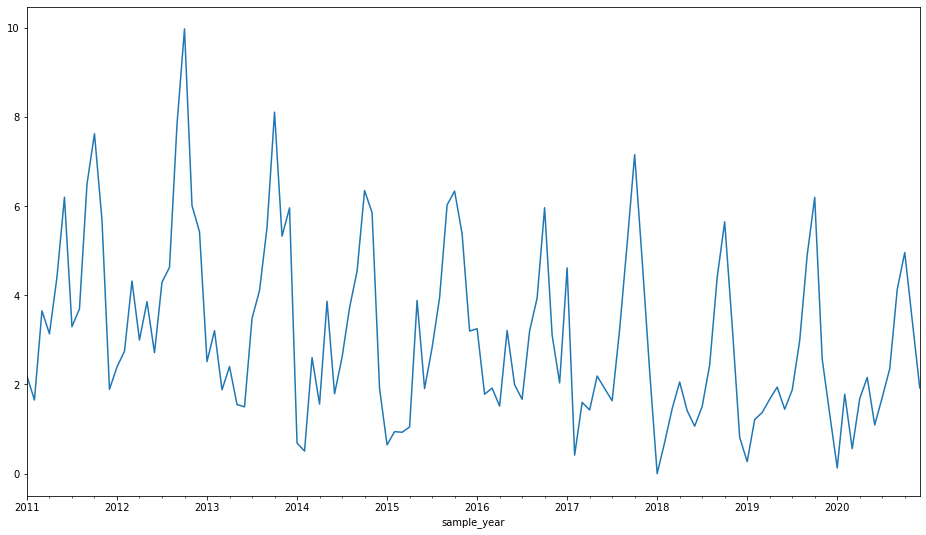

In [290]:
aphis.resample('m').varroa_per_100_bees.mean().plot(figsize=[16,9])

<AxesSubplot:xlabel='sample_year'>

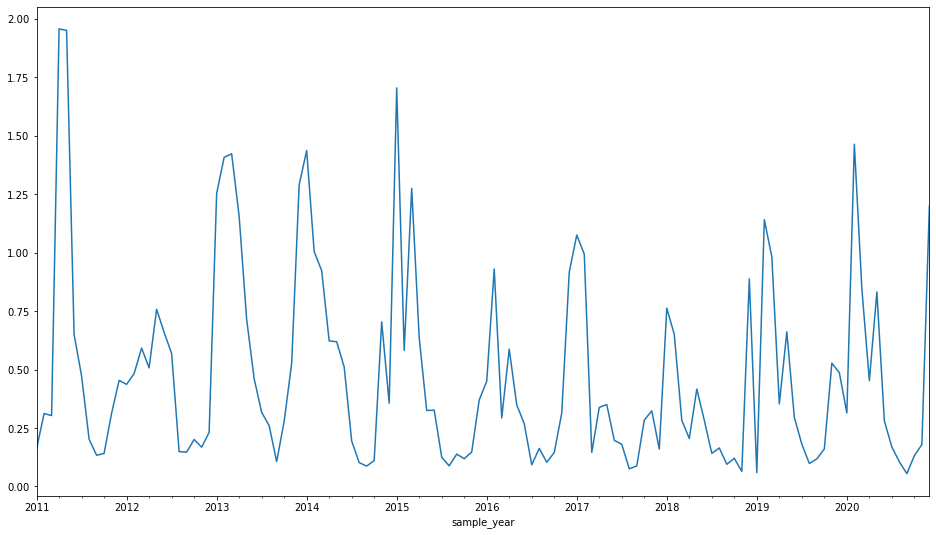

In [286]:
aphis.resample('m').million_spores_per_bee.mean().plot(figsize=[16,9])

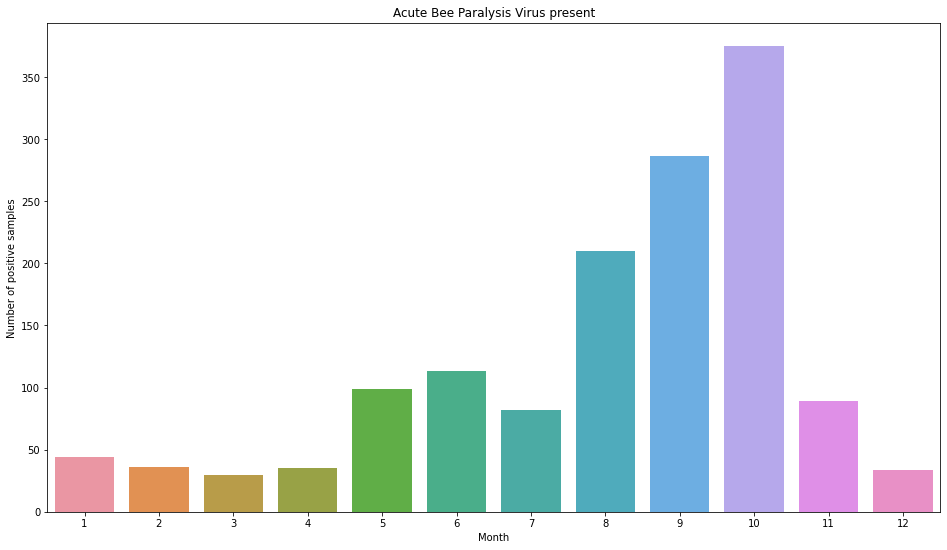

In [323]:
plt.figure(figsize=[16,9])
sns.countplot(x=aphis.abpv[aphis.abpv=='1'].index.month)
plt.xlabel('Month')
plt.ylabel('Number of positive samples')
plt.title('Acute Bee Paralysis Virus present')
plt.show()

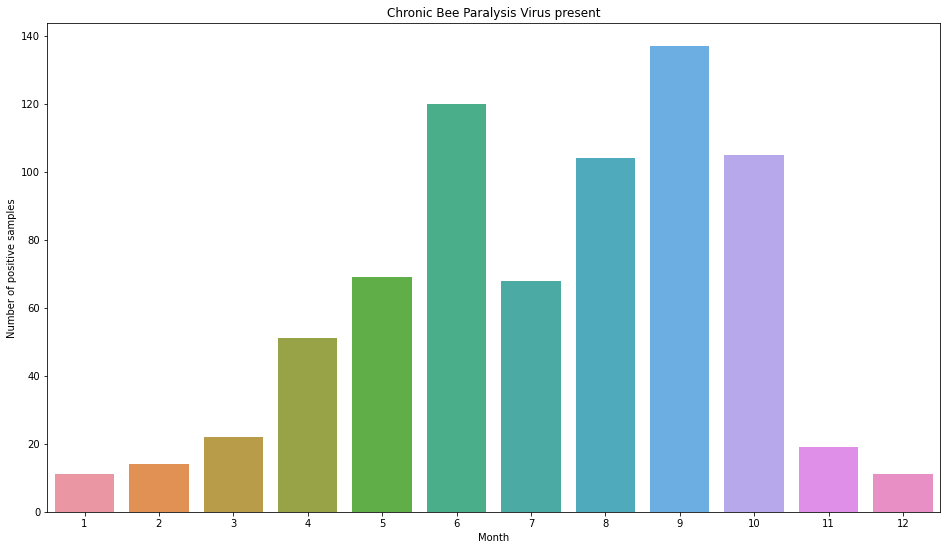

In [329]:
plt.figure(figsize=[16,9])
sns.countplot(x=aphis.cbpv[aphis.cbpv=='1'].index.month)
plt.xlabel('Month')
plt.ylabel('Number of positive samples')
plt.title('Chronic Bee Paralysis Virus present')
plt.show()

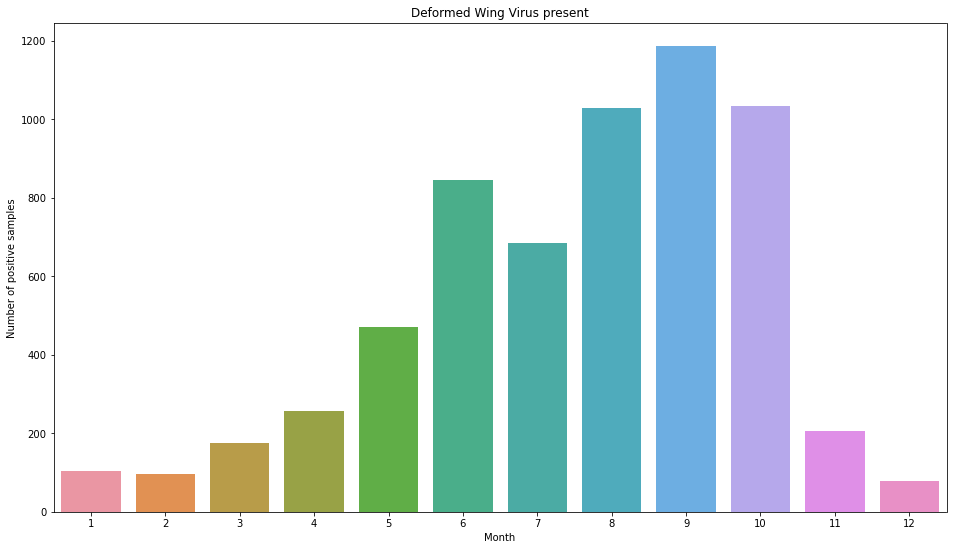

In [338]:
plt.figure(figsize=[16,9])
sns.countplot(x=aphis.dwv[aphis.dwv=='1'].index.month)
plt.xlabel('Month')
plt.ylabel('Number of positive samples')
plt.title('Deformed Wing Virus present')
plt.show()

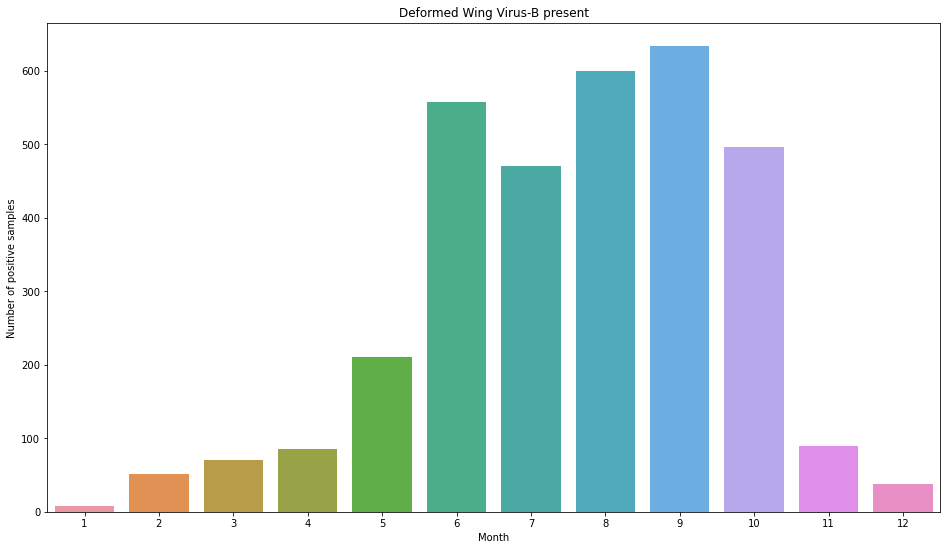

In [341]:
plt.figure(figsize=[16,9])
sns.countplot(x=aphis.dwv_b[aphis.dwv_b=='1'].index.month)
plt.xlabel('Month')
plt.ylabel('Number of positive samples')
plt.title('Deformed Wing Virus-B present')
plt.show()

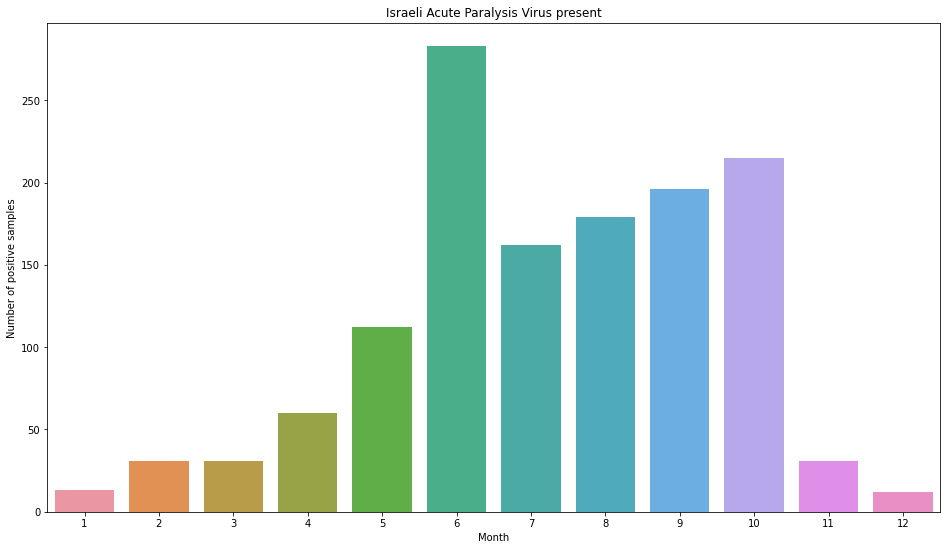

In [342]:
plt.figure(figsize=[16,9])
sns.countplot(x=aphis.iapv[aphis.iapv=='1'].index.month)
plt.xlabel('Month')
plt.ylabel('Number of positive samples')
plt.title('Israeli Acute Paralysis Virus present')
plt.show()

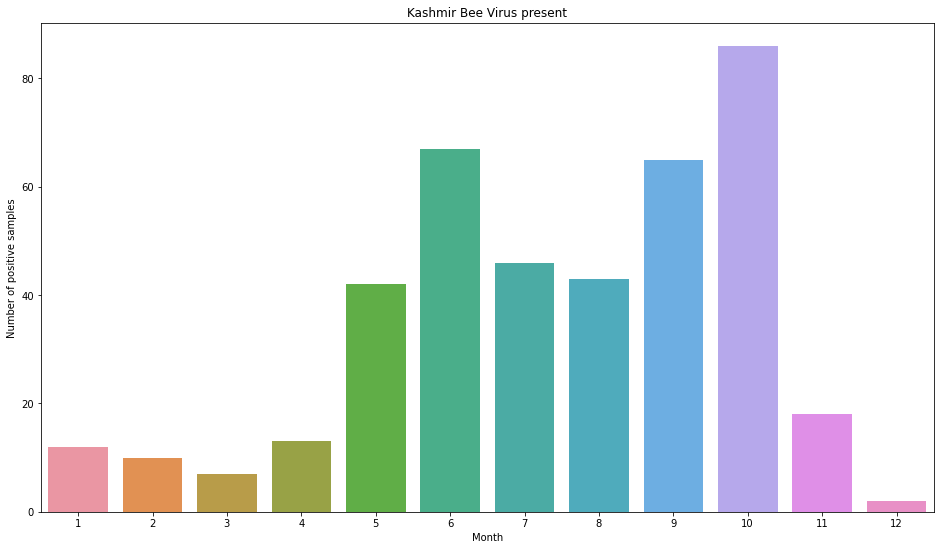

In [343]:
plt.figure(figsize=[16,9])
sns.countplot(x=aphis.kbv[aphis.kbv=='1'].index.month)
plt.xlabel('Month')
plt.ylabel('Number of positive samples')
plt.title('Kashmir Bee Virus present')
plt.show()

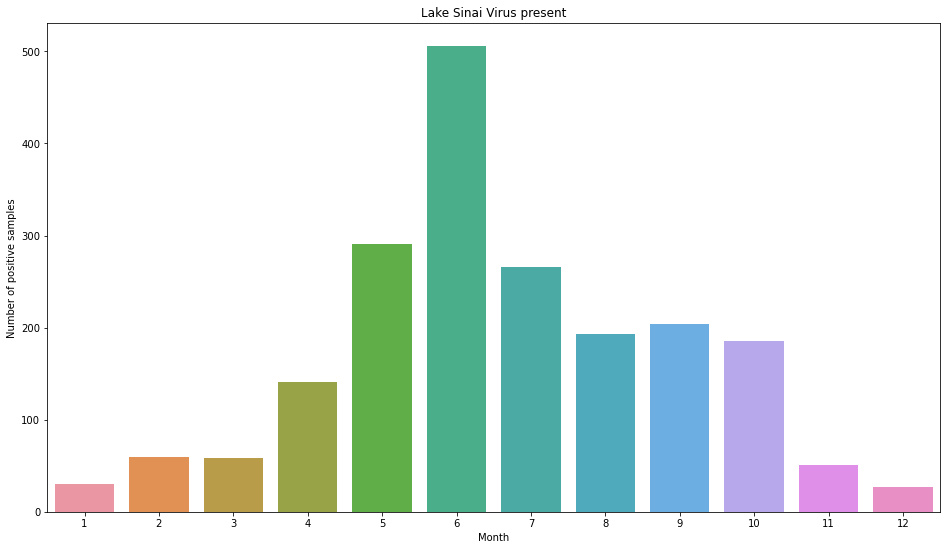

In [344]:
plt.figure(figsize=[16,9])
sns.countplot(x=aphis.lsv2[aphis.lsv2=='1'].index.month)
plt.xlabel('Month')
plt.ylabel('Number of positive samples')
plt.title('Lake Sinai Virus present')
plt.show()

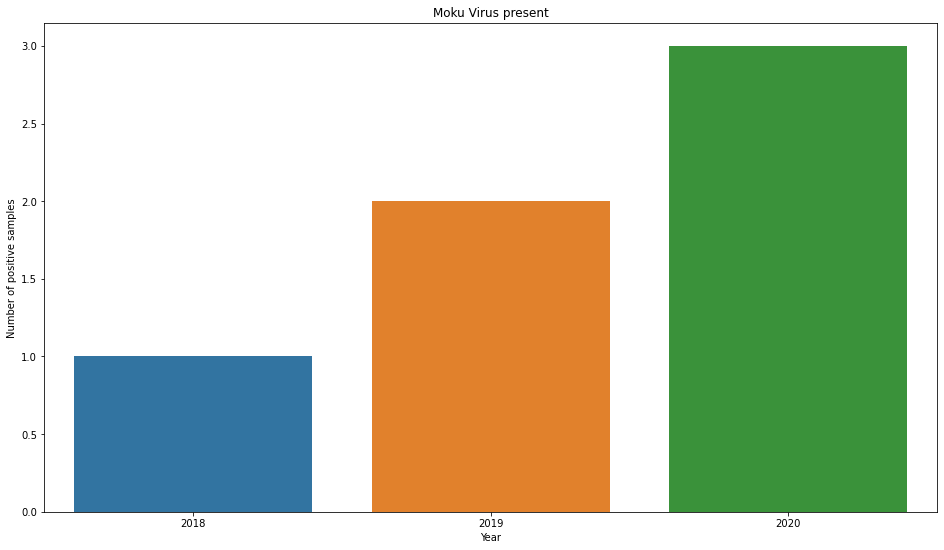

In [349]:
plt.figure(figsize=[16,9])
sns.countplot(x=aphis.mkv[aphis.mkv=='1'].index.year)
plt.xlabel('Year')
plt.ylabel('Number of positive samples')
plt.title('Moku Virus present')
plt.show()

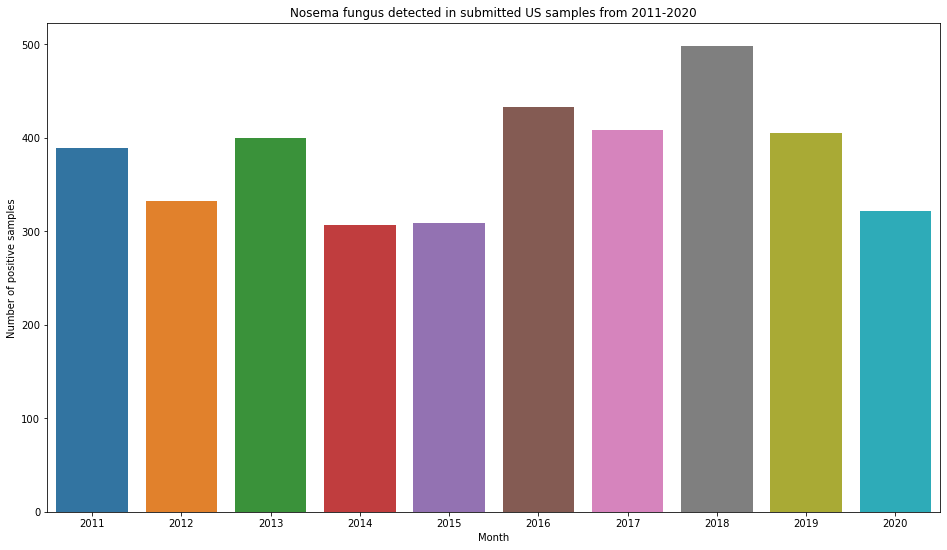

In [337]:
plt.figure(figsize=[16,9])
sns.countplot(x=aphis.million_spores_per_bee[aphis.million_spores_per_bee > 0].index.year)
plt.xlabel('Month')
plt.ylabel('Number of positive samples')
plt.title('Nosema fungus detected in submitted US samples from 2011-2020')
plt.show()

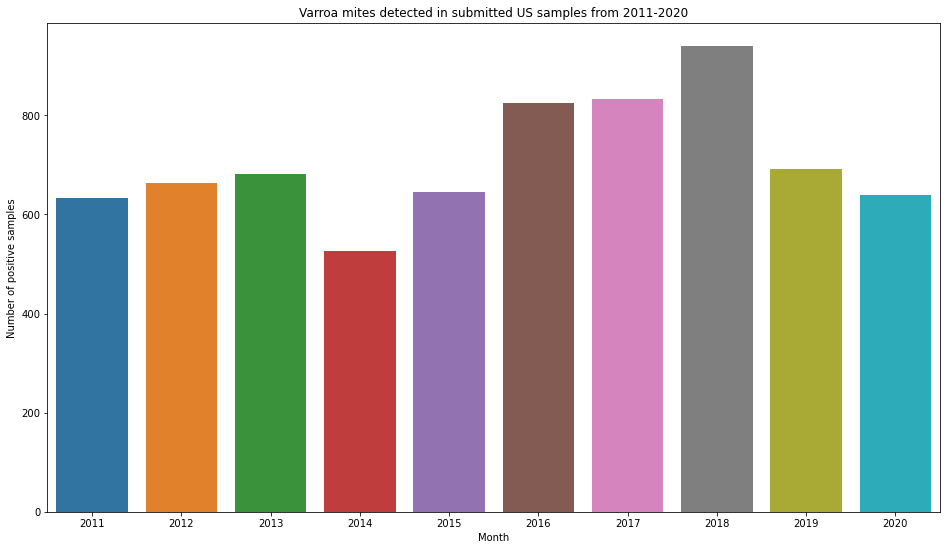

In [334]:
plt.figure(figsize=[16,9])
sns.countplot(x=aphis.varroa_per_100_bees[aphis.varroa_per_100_bees > 0].index.year)
plt.xlabel('Month')
plt.ylabel('Number of positive samples')
plt.title('Varroa mites detected in submitted US samples from 2011-2020')
plt.show()

In [374]:
aphis.pesticides.value_counts()

Bee Bread, No Detections                                                                                                                211
Bee Bread, Fluvalinate (Trace)                                                                                                            8
Bee Bread, Atrazine (Trace)                                                                                                               5
Bee Bread, Coumaphos (Trace)                                                                                                              5
Bee Bread, 2,4-DMPF (Trace)                                                                                                               5
                                                                                                                                       ... 
Bee Bread, Thiabendazole (26.0)                                                                                                           1
Bee Bread, Difenocon

In [378]:
aphis.pesticides = aphis.pesticides.str.replace('Bee Bread, No Detections','0')

In [381]:
aphis.pesticides = aphis.pesticides.str.contains('Bee').replace(True,1)

In [382]:
aphis.pesticides.value_counts()

False    1224
1        1076
Name: pesticides, dtype: int64

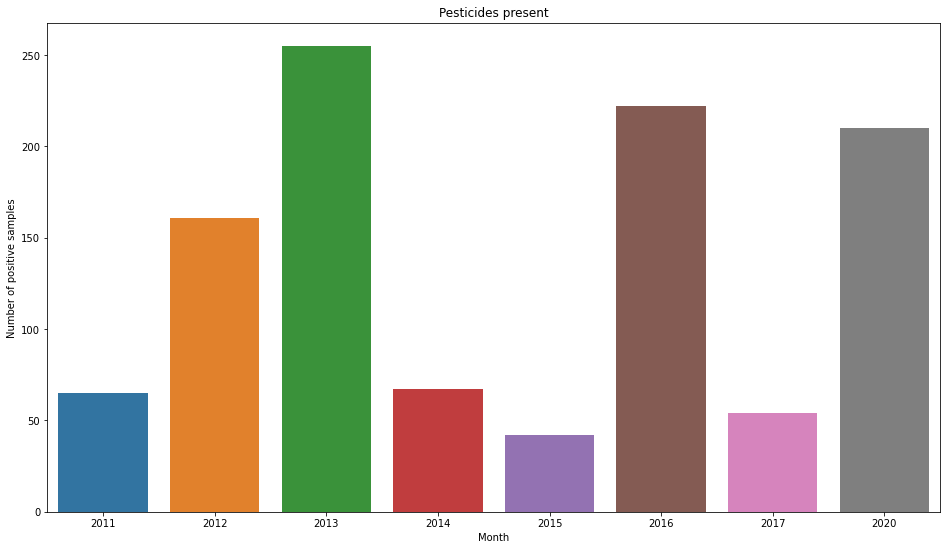

In [385]:
plt.figure(figsize=[16,9])
sns.countplot(x=aphis.pesticides[aphis.pesticides==1].index.year)
plt.xlabel('Month')
plt.ylabel('Number of positive samples')
plt.title('Pesticides present')
plt.show()

In [386]:
aphis.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7985 entries, 2011-01-01 to 2020-12-01
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   sample_month_number     7985 non-null   int64  
 1   sample_month            7985 non-null   object 
 2   state_code              7985 non-null   object 
 3   varroa_per_100_bees     7920 non-null   float64
 4   million_spores_per_bee  7924 non-null   float64
 5   abpv                    7581 non-null   object 
 6   cbpv                    7512 non-null   object 
 7   dwv                     7649 non-null   object 
 8   dwv_b                   4041 non-null   object 
 9   iapv                    7582 non-null   object 
 10  kbv                     6855 non-null   object 
 11  lsv2                    6053 non-null   object 
 12  sbpv                    5033 non-null   object 
 13  mkv                     2209 non-null   object 
 14  pesticides            

In [387]:
aphis

,sample_month_number,sample_month,state_code,varroa_per_100_bees,million_spores_per_bee,abpv,cbpv,dwv,dwv_b,iapv,kbv,lsv2,sbpv,mkv,pesticides
sample_year,,,,,,,,,,,,,,,
2011-01-01,1,January,CA,13.60,0.00,1,0,1,NaN,1,0,NaN,0,NaN,NaN
2011-01-01,1,January,CA,0.15,0.00,1,0,1,NaN,0,0,NaN,0,NaN,NaN
2011-01-01,1,January,CA,0.00,0.00,0,0,1,NaN,0,0,NaN,0,NaN,NaN
2011-01-01,1,January,CA,1.09,0.03,0,0,1,NaN,0,0,NaN,0,NaN,NaN
2011-01-01,1,January,CA,2.03,0.03,0,0,1,NaN,0,0,NaN,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-01,12,December,FL,0.38,0.30,0,1,1,1,1,0,0,0,0,NaN
2020-12-01,12,December,FL,9.74,0.35,0,0,1,1,0,0,0,0,0,1
2020-12-01,12,December,FL,0.00,0.60,0,0,1,1,0,0,1,0,0,NaN


In [388]:
aphis = aphis.drop(columns='sample_month_number')

In [389]:
aphis

,sample_month,state_code,varroa_per_100_bees,million_spores_per_bee,abpv,cbpv,dwv,dwv_b,iapv,kbv,lsv2,sbpv,mkv,pesticides
sample_year,,,,,,,,,,,,,,
2011-01-01,January,CA,13.60,0.00,1,0,1,NaN,1,0,NaN,0,NaN,NaN
2011-01-01,January,CA,0.15,0.00,1,0,1,NaN,0,0,NaN,0,NaN,NaN
2011-01-01,January,CA,0.00,0.00,0,0,1,NaN,0,0,NaN,0,NaN,NaN
2011-01-01,January,CA,1.09,0.03,0,0,1,NaN,0,0,NaN,0,NaN,NaN
2011-01-01,January,CA,2.03,0.03,0,0,1,NaN,0,0,NaN,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-01,December,FL,0.38,0.30,0,1,1,1,1,0,0,0,0,NaN
2020-12-01,December,FL,9.74,0.35,0,0,1,1,0,0,0,0,0,1
2020-12-01,December,FL,0.00,0.60,0,0,1,1,0,0,1,0,0,NaN


In [396]:
aphis.groupby('state_code').resample('m').mean()

varroa_per_100_bees  million_spores_per_bee
state_code sample_year                                             
AK         2018-07-31                1.1760                0.700000
           2018-08-31                   NaN                     NaN
           2018-09-30                   NaN                     NaN
           2018-10-31                   NaN                     NaN
           2018-11-30                   NaN                     NaN
...                                     ...                     ...
WV         2020-05-31                0.3875                0.312500
           2020-06-30                0.4325                0.487500
           2020-07-31                1.1280                0.030000
           2020-08-31                5.5500                0.000000
           2020-09-30                3.2600                0.071429

[4383 rows x 2 columns]

In [404]:
aphis.varroa_per_100_bees = aphis.varroa_per_100_bees.fillna(0).astype(float)

In [406]:
aphis.million_spores_per_bee = aphis.million_spores_per_bee.fillna(0).astype(float)

In [468]:
df_st = aphis.groupby(['state_code']).resample('Y').varroa_per_100_bees.mean().unstack()

In [475]:
df_st

sample_year,2011-12-31,2012-12-31,2013-12-31,2014-12-31,2015-12-31,2016-12-31,2017-12-31,2018-12-31,2019-12-31,2020-12-31
state_code,,,,,,,,,,
AK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.176000,0.654000,NaN
AL,7.364000,7.295833,10.889231,4.009091,3.521852,3.104074,4.903000,3.915833,5.280000,2.905217
AR,4.008000,6.612500,3.927917,5.664583,3.102174,NaN,2.747917,5.167619,4.383571,3.783750
CA,1.696667,1.965778,1.628409,1.654167,1.199091,1.184773,1.169677,1.743333,1.358158,0.912647
CO,10.405263,2.077778,1.862500,NaN,NaN,3.175263,1.224286,2.252500,NaN,NaN
CT,NaN,NaN,NaN,4.997143,2.167083,3.944583,3.581250,NaN,NaN,NaN
DC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.134167,5.724583,5.130000
DE,NaN,4.250000,NaN,NaN,NaN,1.925000,3.450000,1.872391,4.347391,2.321667
FL,5.350800,4.230952,6.331429,3.841200,4.726000,5.457222,5.235263,1.657778,1.309524,1.510000


In [473]:
df_st.T

state_code,AK,AL,AR,CA,CO,CT,DC,DE,FL,GA,...,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV
sample_year,,,,,,,,,,,,,,,,,,,,,
2011-12-31,NaN,7.364000,4.008000,1.696667,10.405263,NaN,NaN,NaN,5.350800,2.775000,...,4.400000,4.092000,6.200476,1.678333,5.732000,11.293750,NaN,2.129412,6.988000,3.564000
2012-12-31,NaN,7.295833,6.612500,1.965778,2.077778,NaN,NaN,4.250000,4.230952,5.141667,...,4.913043,7.233333,4.223077,4.492857,8.350000,5.560000,NaN,NaN,9.084615,10.220833
2013-12-31,NaN,10.889231,3.927917,1.628409,1.862500,NaN,NaN,NaN,6.331429,2.447083,...,2.816667,6.529167,3.261707,2.910625,3.828571,6.518000,NaN,NaN,4.743871,10.228333
2014-12-31,NaN,4.009091,5.664583,1.654167,NaN,4.997143,NaN,NaN,3.841200,1.728696,...,3.453750,3.450357,3.135000,2.478889,3.489231,5.601250,NaN,NaN,NaN,NaN
2015-12-31,NaN,3.521852,3.102174,1.199091,NaN,2.167083,NaN,NaN,4.726000,1.320476,...,2.612500,2.387500,3.311333,1.767727,2.366667,5.219583,3.643333,NaN,9.287391,4.557917
2016-12-31,NaN,3.104074,NaN,1.184773,3.175263,3.944583,NaN,1.925000,5.457222,2.908519,...,2.703750,2.898333,2.634286,2.399130,2.473462,3.938824,3.148750,2.353200,3.494167,4.315833
2017-12-31,NaN,4.903000,2.747917,1.169677,1.224286,3.581250,NaN,3.450000,5.235263,1.912273,...,1.812917,2.428750,3.014167,1.974231,1.894583,3.443871,0.946250,4.863043,2.463182,5.093750
2018-12-31,1.176,3.915833,5.167619,1.743333,2.252500,NaN,6.134167,1.872391,1.657778,2.075556,...,2.248000,6.753750,2.174545,1.169062,3.082051,0.949167,2.210833,4.309286,1.727917,1.947500
2019-12-31,0.654,5.280000,4.383571,1.358158,NaN,NaN,5.724583,4.347391,1.309524,2.598750,...,3.048261,5.082632,1.818095,1.187917,1.736333,4.964333,2.375909,2.794167,1.504167,4.464074


In [452]:
df_st.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, AK to WV
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   2011-12-31 00:00:00  33 non-null     float64
 1   2012-12-31 00:00:00  35 non-null     float64
 2   2013-12-31 00:00:00  33 non-null     float64
 3   2014-12-31 00:00:00  30 non-null     float64
 4   2015-12-31 00:00:00  34 non-null     float64
 5   2016-12-31 00:00:00  42 non-null     float64
 6   2017-12-31 00:00:00  43 non-null     float64
 7   2018-12-31 00:00:00  43 non-null     float64
 8   2019-12-31 00:00:00  37 non-null     float64
 9   2020-12-31 00:00:00  33 non-null     float64
dtypes: float64(10)
memory usage: 4.3+ KB


In [476]:
#df_st.to_csv('df_st.csv')